In [1]:
import pandas as pd,numpy as np, seaborn as sns, matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',200)
pd.set_option('display.max_columns',40)
import plotly.express as px

In [2]:
data=pd.read_csv('/home/pkumari/Downloads/DecStocks/MARUTIALL.csv')

In [3]:
data.head()

Symbol Series         Date  Prev Close  Open Price  High Price  Low Price  \
0  MARUTI     EQ  01-Jan-2020     7368.60     7377.00     7409.95    7282.05   
1  MARUTI     EQ  02-Jan-2020     7311.70     7327.60     7368.00    7312.00   
2  MARUTI     EQ  03-Jan-2020     7329.85     7328.95     7332.00    7226.00   
3  MARUTI     EQ  06-Jan-2020     7254.25     7200.00     7210.00    7026.50   
4  MARUTI     EQ  07-Jan-2020     7042.40     7100.00     7165.60    7026.40   

   Last Price  Close Price  Average Price  Total Traded Quantity  \
0     7308.00      7311.70        7339.10                 634725   
1     7316.45      7329.85        7339.32                 616838   
2     7250.35      7254.25        7275.61                 571967   
3     7032.00      7042.40        7074.03                 748516   
4     7075.00      7073.60        7089.61                 590500   

       Turnover  No. of Trades  Deliverable Qty  % Dly Qt to Traded Qty  
0  4.658307e+09          42182            94094                   14.82  
1  4.527174e+09          51801           173302                   28.10  
2  4.161407e+09          42037           152281                   26.62  
3  5.295028e+09          64186           235356                   31.44  
4  4.186415e+09          50872           113291                   19.19

In [4]:
data.shape

(252, 15)

In [5]:
data.describe()

Prev Close   Open Price   High Price  Low Price   Last Price  \
count   252.000000   252.000000   252.000000   252.0000   252.000000   
mean   6396.034524  6405.124405  6502.287897  6294.9125  6396.158135   
std     892.590727   902.126446   869.992785   926.5175   891.950503   
min    4011.500000  4150.000000  4267.000000  4001.1000  4011.500000   
25%    5743.350000  5745.000000  5848.450000  5650.7500  5742.500000   
50%    6750.025000  6755.000000  6810.425000  6663.0000  6739.550000   
75%    7056.262500  7079.287500  7155.250000  6979.8500  7057.125000   
max    7803.150000  7828.800000  8013.150000  7770.0000  7800.000000   

       Close Price  Average Price  Total Traded Quantity      Turnover  \
count   252.000000     252.000000           2.520000e+02  2.520000e+02   
mean   6397.149603    6398.840119           1.311402e+06  8.087399e+09   
std     893.984988     897.360023           6.243440e+05  3.377841e+09   
min    4011.500000    4099.780000           1.281930e+05  8.783293e+08   
25%    5743.350000    5740.242500           9.022988e+05  5.895399e+09   
50%    6750.025000    6739.880000           1.163944e+06  7.392400e+09   
75%    7056.262500    7065.062500           1.573019e+06  9.426581e+09   
max    7803.150000    7828.180000           3.846792e+06  2.913613e+10   

       No. of Trades  Deliverable Qty  % Dly Qt to Traded Qty  
count     252.000000     2.520000e+02              252.000000  
mean   110971.865079     3.455519e+05               26.509365  
std     52336.388486     2.233260e+05                9.812839  
min     15604.000000     5.607800e+04                8.070000  
25%     76651.000000     1.966162e+05               19.062500  
50%    101357.000000     2.891500e+05               25.200000  
75%    138613.500000     4.154590e+05               33.062500  
max    310721.000000     1.402622e+06               60.970000

In [6]:
data.columns

Index(['Symbol', 'Series', 'Date', 'Prev Close', 'Open Price', 'High Price',
       'Low Price', 'Last Price', 'Close Price', 'Average Price',
       'Total Traded Quantity', 'Turnover', 'No. of Trades', 'Deliverable Qty',
       '% Dly Qt to Traded Qty'],
      dtype='object')

In [7]:
data['Date']=pd.to_datetime(data['Date'])

In [8]:
data['Month_Number']=data['Date'].dt.month
months={1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
data['Month']=data['Month_Number'].map(months)
data['Day']=data['Date'].dt.day
data['dayofweek']=data['Date'].dt.dayofweek
days = {0:'Mon', 1:'Tues', 2:'Wed', 3:'Thurs', 4:'Fri', 5:'Sat', 6:'Sun'} 
data['dayofweek'] = data['dayofweek'].apply(lambda x: days[x])
data.head()

Symbol Series       Date  Prev Close  Open Price  High Price  Low Price  \
0  MARUTI     EQ 2020-01-01     7368.60     7377.00     7409.95    7282.05   
1  MARUTI     EQ 2020-01-02     7311.70     7327.60     7368.00    7312.00   
2  MARUTI     EQ 2020-01-03     7329.85     7328.95     7332.00    7226.00   
3  MARUTI     EQ 2020-01-06     7254.25     7200.00     7210.00    7026.50   
4  MARUTI     EQ 2020-01-07     7042.40     7100.00     7165.60    7026.40   

   Last Price  Close Price  Average Price  Total Traded Quantity  \
0     7308.00      7311.70        7339.10                 634725   
1     7316.45      7329.85        7339.32                 616838   
2     7250.35      7254.25        7275.61                 571967   
3     7032.00      7042.40        7074.03                 748516   
4     7075.00      7073.60        7089.61                 590500   

       Turnover  No. of Trades  Deliverable Qty  % Dly Qt to Traded Qty  \
0  4.658307e+09          42182            94094                   14.82   
1  4.527174e+09          51801           173302                   28.10   
2  4.161407e+09          42037           152281                   26.62   
3  5.295028e+09          64186           235356                   31.44   
4  4.186415e+09          50872           113291                   19.19   

   Month_Number Month  Day dayofweek  
0             1   Jan    1       Wed  
1             1   Jan    2     Thurs  
2             1   Jan    3       Fri  
3             1   Jan    6       Mon  
4             1   Jan    7      Tues

In [9]:
data['Profit']=data['Prev Close']-data['Close Price']
data['Profit_%']=round((data['Profit']/data['Prev Close'])*100,2)

In [10]:
data.head()

Symbol Series       Date  Prev Close  Open Price  High Price  Low Price  \
0  MARUTI     EQ 2020-01-01     7368.60     7377.00     7409.95    7282.05   
1  MARUTI     EQ 2020-01-02     7311.70     7327.60     7368.00    7312.00   
2  MARUTI     EQ 2020-01-03     7329.85     7328.95     7332.00    7226.00   
3  MARUTI     EQ 2020-01-06     7254.25     7200.00     7210.00    7026.50   
4  MARUTI     EQ 2020-01-07     7042.40     7100.00     7165.60    7026.40   

   Last Price  Close Price  Average Price  Total Traded Quantity  \
0     7308.00      7311.70        7339.10                 634725   
1     7316.45      7329.85        7339.32                 616838   
2     7250.35      7254.25        7275.61                 571967   
3     7032.00      7042.40        7074.03                 748516   
4     7075.00      7073.60        7089.61                 590500   

       Turnover  No. of Trades  Deliverable Qty  % Dly Qt to Traded Qty  \
0  4.658307e+09          42182            94094                   14.82   
1  4.527174e+09          51801           173302                   28.10   
2  4.161407e+09          42037           152281                   26.62   
3  5.295028e+09          64186           235356                   31.44   
4  4.186415e+09          50872           113291                   19.19   

   Month_Number Month  Day dayofweek  Profit  Profit_%  
0             1   Jan    1       Wed   56.90      0.77  
1             1   Jan    2     Thurs  -18.15     -0.25  
2             1   Jan    3       Fri   75.60      1.03  
3             1   Jan    6       Mon  211.85      2.92  
4             1   Jan    7      Tues  -31.20     -0.44

In [11]:
px.line(data,x='Date',y='Last Price',hover_data=['Profit_%'],color='Month')

In [12]:
plt.figure(figsize=(12,5))
px.bar(data,x='Date',y='Profit_%',hover_data=['Last Price'],color='Month')

<Figure size 864x360 with 0 Axes>

In [13]:
px.line(data,x='Date',y='High Price',hover_data=['Last Price','Profit_%'],color='Month')

In [14]:
fig = px.area(data, x='Date',y='Last Price',facet_col="Month", facet_col_wrap=2,color='Month')
fig.show()

In [15]:
px.scatter(data,x="Close Price",y="Last Price",color='Month',size='Day')

In [16]:
px.scatter(data,x=['Average Price','High Price','Low Price'],
                        y='Last Price',hover_data=["Day","dayofweek"],log_x=True)

In [17]:
import plotly.express as px
                  
fig = px.scatter(data, x=['Last Price','Close Price','dayofweek'],y="Day",
                 hover_data=['dayofweek'],
                 size_max=(20))
fig.show()

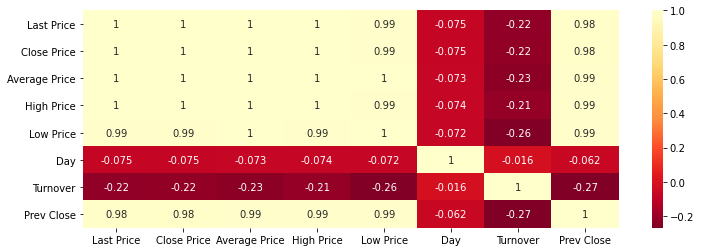

In [18]:
plt.figure(figsize=(12,4))
sns.heatmap(data[['Last Price','Close Price','Average Price','High Price','Low Price','Day','Turnover','Prev Close','Month']].corr(),cmap='YlOrRd_r',annot=True)

In [19]:
data.head()

Symbol Series       Date  Prev Close  Open Price  High Price  Low Price  \
0  MARUTI     EQ 2020-01-01     7368.60     7377.00     7409.95    7282.05   
1  MARUTI     EQ 2020-01-02     7311.70     7327.60     7368.00    7312.00   
2  MARUTI     EQ 2020-01-03     7329.85     7328.95     7332.00    7226.00   
3  MARUTI     EQ 2020-01-06     7254.25     7200.00     7210.00    7026.50   
4  MARUTI     EQ 2020-01-07     7042.40     7100.00     7165.60    7026.40   

   Last Price  Close Price  Average Price  Total Traded Quantity  \
0     7308.00      7311.70        7339.10                 634725   
1     7316.45      7329.85        7339.32                 616838   
2     7250.35      7254.25        7275.61                 571967   
3     7032.00      7042.40        7074.03                 748516   
4     7075.00      7073.60        7089.61                 590500   

       Turnover  No. of Trades  Deliverable Qty  % Dly Qt to Traded Qty  \
0  4.658307e+09          42182            94094                   14.82   
1  4.527174e+09          51801           173302                   28.10   
2  4.161407e+09          42037           152281                   26.62   
3  5.295028e+09          64186           235356                   31.44   
4  4.186415e+09          50872           113291                   19.19   

   Month_Number Month  Day dayofweek  Profit  Profit_%  
0             1   Jan    1       Wed   56.90      0.77  
1             1   Jan    2     Thurs  -18.15     -0.25  
2             1   Jan    3       Fri   75.60      1.03  
3             1   Jan    6       Mon  211.85      2.92  
4             1   Jan    7      Tues  -31.20     -0.44

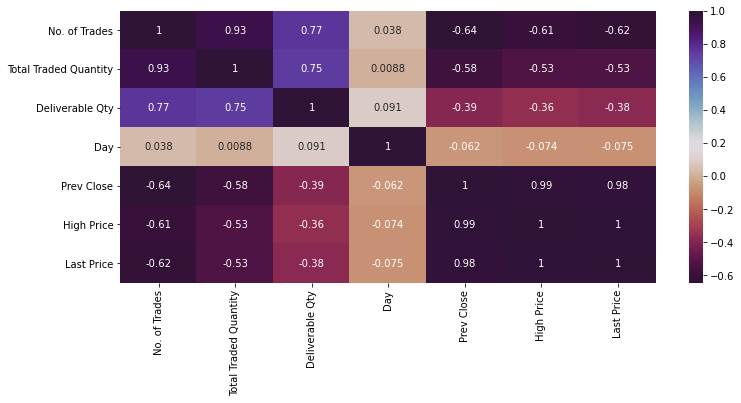

In [20]:
plt.figure(figsize=(12,5))
sns.heatmap(data[['No. of Trades','Total Traded Quantity','Deliverable Qty','Day','Prev Close','High Price','Last Price','Month']].corr(),cmap='twilight_shifted_r',annot=True)

In [21]:
data.columns

Index(['Symbol', 'Series', 'Date', 'Prev Close', 'Open Price', 'High Price',
       'Low Price', 'Last Price', 'Close Price', 'Average Price',
       'Total Traded Quantity', 'Turnover', 'No. of Trades', 'Deliverable Qty',
       '% Dly Qt to Traded Qty', 'Month_Number', 'Month', 'Day', 'dayofweek',
       'Profit', 'Profit_%'],
      dtype='object')

In [22]:
data_model=data[['Prev Close', 'Open Price', 'High Price','Low Price',
                 'Last Price', 'Close Price','Average Price',
                 'Day','Month','Profit','Profit_%']]

## Train Test Split

In [23]:
import statsmodels 
import statsmodels.api as sm
import sklearn 

from sklearn.model_selection import train_test_split

In [24]:
X=data_model['Last Price']

In [25]:
y=data_model['Close Price']

In [26]:
#Train Test Split

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=100)

In [28]:
X_train.shape

(176,)

In [29]:
X_test.shape

(76,)

In [30]:
#Trainging the model
X_train_sm=sm.add_constant(X_train)
X_train_sm.head()

const  Last Price
74     1.0     5009.95
133    1.0     5809.10
204    1.0     7102.00
205    1.0     7056.50
203    1.0     6809.00

In [31]:
lr=sm.OLS(y_train,X_train_sm) #it creates object

In [32]:
lr_model=lr.fit()

In [33]:
lr_model.params

const        -19.712527
Last Price     1.003017
dtype: float64

In [34]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Close Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.400e+05
Date:                Sat, 23 Jan 2021   Prob (F-statistic):          9.58e-306
Time:                        17:17:28   Log-Likelihood:                -739.76
No. Observations:                 176   AIC:                             1484.
Df Residuals:                     174   BIC:                             1490.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -19.7125      8.805     -2.239      0.026     -37.092      -2.333
Last Price     1.0030      0.001    734.820      0.000       1.000       1.006
==============================================================================
Omnibus:                       40.404   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.417
Skew:                          -0.720   Prob(JB):                     1.65e-42
Kurtosis:                       7.916   Cond. No.                     4.63e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.63e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
y_train.values.reshape(-1,1)

array([[5001.1 ],
       [5801.3 ],
       [7103.25],
       [7054.8 ],
       [6811.55],
       [7330.5 ],
       [4829.85],
       [6123.6 ],
       [6971.75],
       [6649.2 ],
       [7762.7 ],
       [6234.85],
       [5754.9 ],
       [6730.3 ],
       [7186.05],
       [7329.85],
       [7062.4 ],
       [5045.65],
       [7104.1 ],
       [7231.65],
       [6981.45],
       [5803.1 ],
       [7709.25],
       [5114.05],
       [7803.15],
       [6497.7 ],
       [6852.25],
       [5875.35],
       [5475.75],
       [5352.65],
       [5690.2 ],
       [5331.35],
       [6555.75],
       [4220.35],
       [6386.05],
       [6809.25],
       [7055.7 ],
       [6907.6 ],
       [6044.4 ],
       [5867.5 ],
       [6440.55],
       [6839.95],
       [7649.6 ],
       [7482.95],
       [7010.3 ],
       [6893.1 ],
       [4720.95],
       [7092.8 ],
       [6963.3 ],
       [6818.85],
       [4886.3 ],
       [7733.55],
       [7520.15],
       [7147.1 ],
       [6781.1 ],
       [50

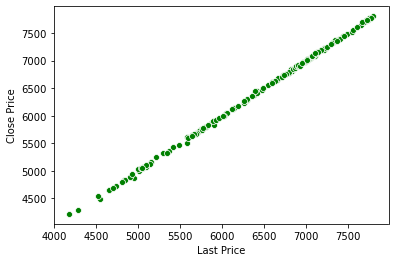

In [36]:
sns.scatterplot(X_train,y_train,color='G')

In [37]:
y_train_pred=lr_model.predict(X_train_sm)

In [38]:
res=y_train_pred-y_train

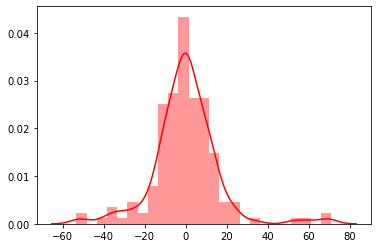

In [39]:
sns.distplot(res,color='Red')

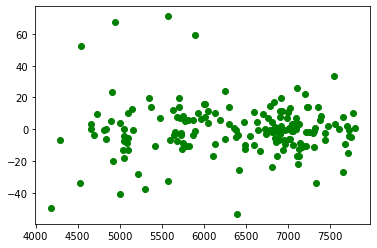

In [40]:
plt.scatter(X_train,res,color='G')

In [41]:
#Evaluation
from sklearn.metrics import r2_score , mean_squared_error

In [42]:
r2_score(y_true=y_train,y_pred=y_train_pred)

0.9996778580022744

In [43]:
mean_squared_error(y_true=y_train,y_pred=y_train_pred)


262.02888505837547

In [44]:
#On test set

In [45]:
X_test_sm=sm.add_constant(X_test)

In [46]:
y_test_pred=lr_model.predict(X_test_sm)

In [47]:
res=y_test_pred-y_test

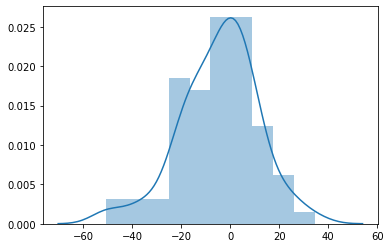

In [48]:
sns.distplot(res)

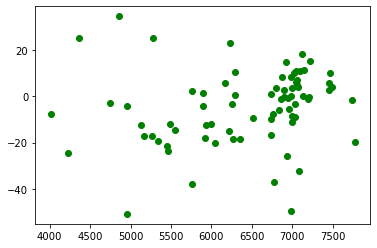

In [49]:
plt.scatter(X_test,res,color='G')

In [50]:
r2_score(y_true=y_test,y_pred=y_test_pred)

0.999639572157772

## Steps using Sklearn

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
#reshaping X_train to (n,1)
X_train_lm=X_train.values.reshape(-1,1)

In [53]:
lm=LinearRegression()
lm.fit(X_train_lm,y_train)

LinearRegression()

In [54]:
X_test_lm=X_test.values.reshape(-1,1)

In [55]:
print(lm.coef_)

[1.00301726]


In [56]:
print(lm.intercept_)

-19.712526645716935


In [57]:
#make prediction
y_train_pred=lm.predict(X_train_lm)

In [58]:
res=y_train_pred-y_train

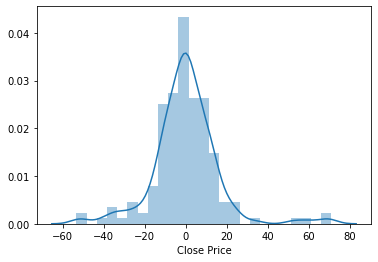

In [59]:
sns.distplot(res)

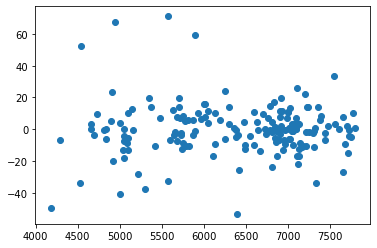

In [60]:
plt.scatter(X_train,res)

In [61]:
r2_score(y_true=y_train,y_pred=y_train_pred)

0.9996778580022744

In [62]:
y_test_pred=lm.predict(X_test_lm)

In [63]:
res=y_test_pred-y_test

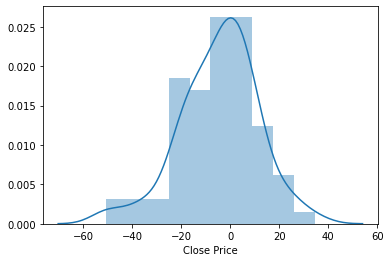

In [64]:
sns.distplot(res)

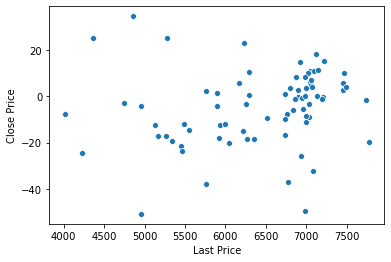

In [65]:
sns.scatterplot(X_test,res)

In [66]:
r2_score(y_true=y_test,y_pred=y_test_pred)

0.999639572157772

## Multiple Linear Regression

In [67]:
# Index(['Symbol', 'Series', 'Date', 'Prev Close', 'Open Price', 'High Price',
#        'Low Price', 'Last Price', 'Close Price', 'Average Price',
#        'Total Traded Quantity', 'Turnover', 'No. of Trades', 'Deliverable Qty',
#        '% Dly Qt to Traded Qty', 'Month_Number', 'Month', 'Day', 'dayofweek',
#        'Profit', 'Profit_%'])

In [68]:
data_model=data[['Prev Close', 'Open Price', 'High Price',
       'Low Price', 'Last Price', 'Close Price', 'Average Price',
       'Total Traded Quantity', 'Turnover', 'No. of Trades', 'Deliverable Qty','Month', 'Day','Profit', 'Profit_%']]

In [69]:
#creating dummy variables

In [70]:
status=pd.get_dummies(data_model['Month'],drop_first=True)

In [71]:
status.head()

Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep
0    0    0    0    1    0    0    0    0    0    0    0
1    0    0    0    1    0    0    0    0    0    0    0
2    0    0    0    1    0    0    0    0    0    0    0
3    0    0    0    1    0    0    0    0    0    0    0
4    0    0    0    1    0    0    0    0    0    0    0

In [72]:
data_model=pd.concat([data_model,status],axis=1)

In [73]:
data_model

Prev Close  Open Price  High Price  Low Price  Last Price  Close Price  \
0       7368.60     7377.00     7409.95    7282.05     7308.00      7311.70   
1       7311.70     7327.60     7368.00    7312.00     7316.45      7329.85   
2       7329.85     7328.95     7332.00    7226.00     7250.35      7254.25   
3       7254.25     7200.00     7210.00    7026.50     7032.00      7042.40   
4       7042.40     7100.00     7165.60    7026.40     7075.00      7073.60   
..          ...         ...         ...        ...         ...          ...   
247     7449.95     7507.25     7532.75    7414.20     7449.00      7446.05   
248     7446.05     7465.00     7543.00    7454.00     7484.00      7483.00   
249     7483.00     7520.00     7545.00    7418.30     7447.50      7452.35   
250     7452.35     7497.00     7635.00    7430.00     7610.00      7612.90   
251     7612.90     7614.65     7697.00    7580.00     7654.00      7649.60   

     Average Price  Total Traded Quantity      Turnover  No. of Trades  \
0          7339.10                 634725  4.658307e+09          42182   
1          7339.32                 616838  4.527174e+09          51801   
2          7275.61                 571967  4.161407e+09          42037   
3          7074.03                 748516  5.295028e+09          64186   
4          7089.61                 590500  4.186415e+09          50872   
..             ...                    ...           ...            ...   
247        7463.58                 589281  4.398147e+09          50741   
248        7492.13                 521320  3.905798e+09          52080   
249        7469.74                 538719  4.024091e+09          50326   
250        7546.90                1029800  7.771796e+09          81204   
251        7646.68                 908515  6.947120e+09          76829   

     Deliverable Qty Month  Day  Profit  Profit_%  Aug  Dec  Feb  Jan  Jul  \
0              94094   Jan    1   56.90      0.77    0    0    0    1    0   
1             173302   Jan    2  -18.15     -0.25    0    0    0    1    0   
2             152281   Jan    3   75.60      1.03    0    0    0    1    0   
3             235356   Jan    6  211.85      2.92    0    0    0    1    0   
4             113291   Jan    7  -31.20     -0.44    0    0    0    1    0   
..               ...   ...  ...     ...       ...  ...  ...  ...  ...  ...   
247           112711   Dec   24    3.90      0.05    0    1    0    0    0   
248           108261   Dec   28  -36.95     -0.50    0    1    0    0    0   
249           143100   Dec   29   30.65      0.41    0    1    0    0    0   
250           201109   Dec   30 -160.55     -2.15    0    1    0    0    0   
251           239335   Dec   31  -36.70     -0.48    0    1    0    0    0   

     Jun  Mar  May  Nov  Oct  Sep  
0      0    0    0    0    0    0  
1      0    0    0    0    0    0  
2      0    0    0    0    0    0  
3      0    0    0    0    0    0  
4      0    0    0    0    0    0  
..   ...  ...  ...  ...  ...  ...  
247    0    0    0    0    0    0  
248    0    0    0    0    0    0  
249    0    0    0    0    0    0  
250    0    0    0    0    0    0  
251    0    0    0    0    0    0  

[252 rows x 26 columns]

In [74]:
data_model.drop('Month',axis=1,inplace=True)
data_model

Prev Close  Open Price  High Price  Low Price  Last Price  Close Price  \
0       7368.60     7377.00     7409.95    7282.05     7308.00      7311.70   
1       7311.70     7327.60     7368.00    7312.00     7316.45      7329.85   
2       7329.85     7328.95     7332.00    7226.00     7250.35      7254.25   
3       7254.25     7200.00     7210.00    7026.50     7032.00      7042.40   
4       7042.40     7100.00     7165.60    7026.40     7075.00      7073.60   
..          ...         ...         ...        ...         ...          ...   
247     7449.95     7507.25     7532.75    7414.20     7449.00      7446.05   
248     7446.05     7465.00     7543.00    7454.00     7484.00      7483.00   
249     7483.00     7520.00     7545.00    7418.30     7447.50      7452.35   
250     7452.35     7497.00     7635.00    7430.00     7610.00      7612.90   
251     7612.90     7614.65     7697.00    7580.00     7654.00      7649.60   

     Average Price  Total Traded Quantity      Turnover  No. of Trades  \
0          7339.10                 634725  4.658307e+09          42182   
1          7339.32                 616838  4.527174e+09          51801   
2          7275.61                 571967  4.161407e+09          42037   
3          7074.03                 748516  5.295028e+09          64186   
4          7089.61                 590500  4.186415e+09          50872   
..             ...                    ...           ...            ...   
247        7463.58                 589281  4.398147e+09          50741   
248        7492.13                 521320  3.905798e+09          52080   
249        7469.74                 538719  4.024091e+09          50326   
250        7546.90                1029800  7.771796e+09          81204   
251        7646.68                 908515  6.947120e+09          76829   

     Deliverable Qty  Day  Profit  Profit_%  Aug  Dec  Feb  Jan  Jul  Jun  \
0              94094    1   56.90      0.77    0    0    0    1    0    0   
1             173302    2  -18.15     -0.25    0    0    0    1    0    0   
2             152281    3   75.60      1.03    0    0    0    1    0    0   
3             235356    6  211.85      2.92    0    0    0    1    0    0   
4             113291    7  -31.20     -0.44    0    0    0    1    0    0   
..               ...  ...     ...       ...  ...  ...  ...  ...  ...  ...   
247           112711   24    3.90      0.05    0    1    0    0    0    0   
248           108261   28  -36.95     -0.50    0    1    0    0    0    0   
249           143100   29   30.65      0.41    0    1    0    0    0    0   
250           201109   30 -160.55     -2.15    0    1    0    0    0    0   
251           239335   31  -36.70     -0.48    0    1    0    0    0    0   

     Mar  May  Nov  Oct  Sep  
0      0    0    0    0    0  
1      0    0    0    0    0  
2      0    0    0    0    0  
3      0    0    0    0    0  
4      0    0    0    0    0  
..   ...  ...  ...  ...  ...  
247    0    0    0    0    0  
248    0    0    0    0    0  
249    0    0    0    0    0  
250    0    0    0    0    0  
251    0    0    0    0    0  

[252 rows x 25 columns]

## Splitting into Train and test

In [75]:
data_model_train,data_model_test=train_test_split(data_model,train_size=0.7,random_state=100)

In [76]:
data_model_train.shape

(176, 25)

In [77]:
data_model_test.shape

(76, 25)

## Scaling Features

In [78]:
from sklearn.preprocessing import MinMaxScaler

In [79]:
scale=MinMaxScaler()

In [80]:
data_model_train.head()

Prev Close  Open Price  High Price  Low Price  Last Price  Close Price  \
74      5331.35      5131.3      5131.3    4884.50     5009.95      5001.10   
133     5771.75      5810.0      5879.8    5755.00     5809.10      5801.30   
204     6811.55      6858.0      7124.7    6832.00     7102.00      7103.25   
205     7103.25      7100.0      7161.3    6935.05     7056.50      7054.80   
203     6861.85      6828.0      6860.0    6775.20     6809.00      6811.55   

     Average Price  Total Traded Quantity      Turnover  No. of Trades  \
74         5001.21                1843174  9.218105e+09         174888   
133        5817.70                1246712  7.252996e+09          98323   
204        7021.17                1758999  1.235023e+10         130909   
205        7056.34                1559361  1.100339e+10         133834   
203        6808.01                 584542  3.979570e+09          51489   

     Deliverable Qty  Day  Profit  Profit_%  Aug  Dec  Feb  Jan  Jul  Jun  \
74            547983   21  330.25      6.19    0    0    0    0    0    0   
133           294213   15  -29.55     -0.51    0    0    0    0    1    0   
204           397760   23 -291.70     -4.28    0    0    0    0    0    0   
205           367279   26   48.45      0.68    0    0    0    0    0    0   
203           173752   22   50.30      0.73    0    0    0    0    0    0   

     Mar  May  Nov  Oct  Sep  
74     0    0    0    0    0  
133    0    0    0    0    0  
204    0    0    0    1    0  
205    0    0    0    1    0  
203    0    0    0    1    0

In [81]:
num_var=['Prev Close', 'Open Price', 'High Price', 'Low Price', 'Last Price',
       'Close Price', 'Average Price', 'Total Traded Quantity', 'Turnover',
       'No. of Trades', 'Deliverable Qty', 'Day', 'Profit', 'Profit_%']

In [82]:
data_model_train[num_var]=scale.fit_transform(data_model_train[num_var])


In [83]:
data_model_train

Prev Close  Open Price  High Price  Low Price  Last Price  Close Price  \
74     0.348719    0.268115    0.187089   0.232201    0.229694     0.217916   
133    0.465078    0.453552    0.398226   0.468750    0.450331     0.441261   
204    0.739805    0.739891    0.749386   0.761413    0.807289     0.804650   
205    0.816875    0.806011    0.759711   0.789416    0.794727     0.791127   
203    0.753095    0.731694    0.674720   0.745978    0.726394     0.723233   
7      0.849809    0.850109    0.812911   0.870761    0.869961     0.868078   
83     0.231132    0.230874    0.158388   0.209239    0.181391     0.170118   
126    0.507444    0.495478    0.473795   0.514946    0.540309     0.531219   
28     0.795302    0.789344    0.728315   0.789402    0.770845     0.767947   
152    0.686262    0.687158    0.633395   0.701359    0.682137     0.677920   
235    0.986010    0.983060    1.000000   0.997283    0.987300     0.988710   
40     0.634913    0.601093    0.536177   0.585883    0.574821     0.562270   
120    0.462581    0.450820    0.378537   0.452446    0.432634     0.428310   
153    0.696910    0.672117    0.651604   0.696223    0.704597     0.700555   
207    0.831446    0.831954    0.807862   0.836957    0.826891     0.827760   
1      0.871950    0.868197    0.818016   0.891848    0.866496     0.867897   
194    0.810693    0.795082    0.759062   0.807337    0.795555     0.793248   
77     0.302482    0.259563    0.189543   0.271739    0.240751     0.230351   
165    0.815488    0.812842    0.758216   0.814796    0.808559     0.804887   
174    0.846467    0.850820    0.798666   0.852717    0.839647     0.840488   
221    0.750558    0.741803    0.713337   0.769837    0.775538     0.770654   
123    0.482661    0.461284    0.399693   0.474185    0.446438     0.441763   
236    0.991109    0.990437    0.939861   0.995109    0.974600     0.973791   
90     0.270711    0.206284    0.190954   0.223410    0.255936     0.249442   
233    0.984874    0.996721    0.963189   0.981318    1.000000     1.000000   
185    0.604040    0.613388    0.578404   0.625272    0.637769     0.635634   
220    0.739197    0.737705    0.674692   0.762228    0.738266     0.734593   
134    0.472885    0.453279    0.409565   0.467935    0.468194     0.461929   
111    0.409594    0.374317    0.315069   0.369851    0.361140     0.350396   
54     0.420743    0.415574    0.344349   0.348519    0.329155     0.316038   
104    0.426041    0.412022    0.353135   0.419022    0.422018     0.410252   
73     0.394600    0.372131    0.311952   0.339674    0.309028     0.310093   
149    0.664425    0.651626    0.597388   0.653370    0.655232     0.651837   
57     0.282098    0.116120    0.090815   0.030163    0.000000     0.000000   
44     0.600724    0.592350    0.551212   0.611549    0.609636     0.604471   
219    0.746489    0.745902    0.680362   0.748913    0.727443     0.722591   
227    0.831446    0.846995    0.785394   0.811685    0.794865     0.791378   
214    0.814114    0.803825    0.752292   0.777174    0.751518     0.750042   
128    0.585294    0.567418    0.498420   0.541467    0.516786     0.509113   
136    0.504115    0.487705    0.414079   0.484239    0.468526     0.459738   
182    0.691031    0.689891    0.625624   0.620204    0.617766     0.619683   
166    0.817100    0.816393    0.759344   0.750122    0.728175     0.731160   
251    0.951530    0.946626    0.910821   0.964674    0.959691     0.957142   
10     0.891792    0.884959    0.856661   0.902989    0.912203     0.910629   
20     0.788816    0.781421    0.747003   0.800272    0.785202     0.778707   
157    0.728404    0.715410    0.693027   0.742092    0.749034     0.745995   
92     0.287700    0.254208    0.176850   0.176780    0.154059     0.139723   
213    0.777455    0.784153    0.743801   0.801535    0.806184     0.801733   
223    0.803942    0.787158    0.750881   0.784022    0.765047     0.765588   
190    0.735776    0.741803    0.679685   0.737772    0

In [84]:
data_model_train.describe()

Prev Close  Open Price  High Price   Low Price  Last Price  \
count  176.000000  176.000000  176.000000  176.000000  176.000000   
mean     0.627773    0.614745    0.571977    0.613141    0.610153   
std      0.238111    0.247604    0.247555    0.253623    0.248921   
min      0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.450665    0.431578    0.379266    0.433105    0.425632   
50%      0.714909    0.703552    0.647577    0.695938    0.693112   
75%      0.808843    0.804372    0.759436    0.807609    0.801422   
max      1.000000    1.000000    1.000000    1.000000    1.000000   

       Close Price  Average Price  Total Traded Quantity    Turnover  \
count   176.000000     176.000000             176.000000  176.000000   
mean      0.604886       0.594116               0.319556    0.255774   
std       0.252444       0.255898               0.176281    0.127569   
min       0.000000       0.000000               0.000000    0.000000   
25%       0.415318       0.400344               0.208607    0.179004   
50%       0.689586       0.678175               0.280291    0.231064   
75%       0.798537       0.787553               0.387367    0.295366   
max       1.000000       1.000000               1.000000    1.000000   

       No. of Trades  Deliverable Qty         Day      Profit    Profit_%  \
count     176.000000       176.000000  176.000000  176.000000  176.000000   
mean        0.324191         0.213869    0.491667    0.422577    0.442661   
std         0.184322         0.169831    0.283101    0.111124    0.099841   
min         0.000000         0.000000    0.000000    0.000000    0.000000   
25%         0.206006         0.100922    0.266667    0.377698    0.410256   
50%         0.290573         0.162040    0.500000    0.418196    0.440664   
75%         0.402423         0.257299    0.733333    0.466342    0.475756   
max         1.000000         1.000000    1.000000    1.000000    1.000000   

              Aug         Dec         Feb         Jan         Jul         Jun  \
count  176.000000  176.000000  176.000000  176.000000  176.000000  176.000000   
mean     0.073864    0.090909    0.062500    0.102273    0.090909    0.090909   
std      0.262295    0.288300    0.242752    0.303871    0.288300    0.288300   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              Mar         May         Nov         Oct         Sep  
count  176.000000  176.000000  176.000000  176.000000  176.000000  
mean     0.085227    0.079545    0.062500    0.079545    0.107955  
std      0.280016    0.271360    0.242752    0.271360    0.311208  
min      0.000000    0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000    1.000000    1.000000

## Training the model

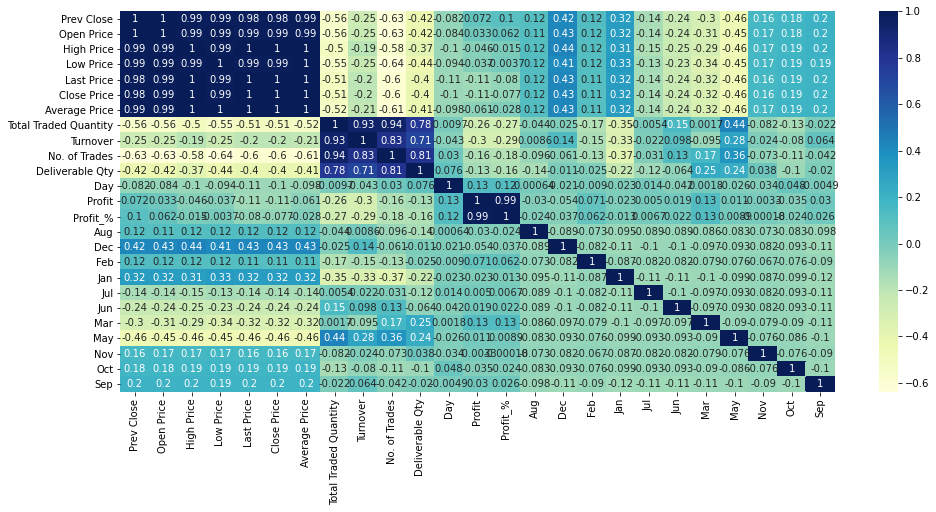

In [85]:
plt.figure(figsize=(16,7))
sns.heatmap(data_model_train.corr(),annot=True,cmap='YlGnBu')

In [86]:
# X_train y _traim

y_train=data_model_train.pop('Close Price')
X_train=data_model_train

In [87]:
X_train.head()

Prev Close  Open Price  High Price  Low Price  Last Price  Average Price  \
74     0.348719    0.268115    0.187089   0.232201    0.229694       0.201295   
133    0.465078    0.453552    0.398226   0.468750    0.450331       0.431978   
204    0.739805    0.739891    0.749386   0.761413    0.807289       0.771995   
205    0.816875    0.806011    0.759711   0.789416    0.794727       0.781932   
203    0.753095    0.731694    0.674720   0.745978    0.726394       0.711771   

     Total Traded Quantity  Turnover  No. of Trades  Deliverable Qty  \
74                0.461190  0.295132       0.539732         0.365309   
133               0.300790  0.225590       0.280292         0.176849   
204               0.438554  0.405973       0.390709         0.253747   
205               0.384868  0.358310       0.400621         0.231111   
203               0.122721  0.109748       0.121596         0.087390   

          Day    Profit  Profit_%  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  \
74   0.666667  0.644615  0.647600    0    0    0    0    0    0    0    0   
133  0.466667  0.402716  0.427350    0    0    0    0    1    0    0    0   
204  0.733333  0.226469  0.303419    0    0    0    0    0    0    0    0   
205  0.833333  0.455157  0.466469    0    0    0    0    0    0    0    0   
203  0.700000  0.456400  0.468113    0    0    0    0    0    0    0    0   

     Nov  Oct  Sep  
74     0    0    0  
133    0    0    0  
204    0    1    0  
205    0    1    0  
203    0    1    0

In [88]:
y_train.head()

74     0.217916
133    0.441261
204    0.804650
205    0.791127
203    0.723233
Name: Close Price, dtype: float64

In [89]:
#statistical significance of variables 
# if variables are correlated then we handle it VIF

In [90]:
X_train_sm=sm.add_constant(X_train['High Price'])

# creating model
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.params

const         0.024197
High Price    1.015232
dtype: float64

In [91]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Close Price   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.950e+04
Date:                Sat, 23 Jan 2021   Prob (F-statistic):          1.37e-180
Time:                        17:17:31   Log-Likelihood:                 409.12
No. Observations:                 176   AIC:                            -814.2
Df Residuals:                     174   BIC:                            -807.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0242      0.005      5.343      0.000       0.015       0.033
High Price     1.0152      0.007    139.654      0.000       1.001       1.030
==============================================================================
Omnibus:                       70.055   Durbin-Watson:                   2.152
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.674
Skew:                          -1.647   Prob(JB):                     8.02e-46
Kurtosis:                       7.179   Cond. No.                         5.44
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
#add another variable 
X_train_sm=sm.add_constant(X_train[['High Price','Prev Close']])

In [93]:
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Close Price   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.026e+04
Date:                Sat, 23 Jan 2021   Prob (F-statistic):          1.87e-180
Time:                        17:17:31   Log-Likelihood:                 414.06
No. Observations:                 176   AIC:                            -822.1
Df Residuals:                     173   BIC:                            -812.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0383      0.006      6.098      0.000       0.026       0.051
High Price     1.1777      0.052     22.682      0.000       1.075       1.280
Prev Close    -0.1705      0.054     -3.159      0.002      -0.277      -0.064
==============================================================================
Omnibus:                       60.749   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.325
Skew:                          -1.496   Prob(JB):                     2.28e-33
Kurtosis:                       6.398   Cond. No.                         56.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
X_train_sm=sm.add_constant(X_train[['High Price','Prev Close','Low Price']])
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Close Price   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.265e+04
Date:                Sat, 23 Jan 2021   Prob (F-statistic):          1.95e-201
Time:                        17:17:31   Log-Likelihood:                 468.35
No. Observations:                 176   AIC:                            -928.7
Df Residuals:                     172   BIC:                            -916.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0410      0.005      8.840      0.000       0.032       0.050
High Price     0.8821      0.045     19.440      0.000       0.793       0.972
Prev Close    -0.4022      0.044     -9.114      0.000      -0.489      -0.315
Low Price      0.5086      0.042     12.115      0.000       0.426       0.592
==============================================================================
Omnibus:                       22.791   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.453
Skew:                          -0.099   Prob(JB):                     8.51e-26
Kurtosis:                       6.963   Cond. No.                         64.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Adding All the variables

In [95]:
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            Close Price   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.008e+05
Date:                Sat, 23 Jan 2021   Prob (F-statistic):                        0.00
Time:                        17:17:31   Log-Likelihood:                          772.30
No. Observations:                 176   AIC:                                     -1497.
Df Residuals:                     152   BIC:                                     -1421.
Df Model:                          24                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Prev Close                0.2593      0.035      7.331      0.000       0.189       0.329
Open Price               -0.0361      0.020     -1.808      0.073      -0.075       0.003
High Price               -0.0272      0.032     -0.856      0.394      -0.090       0.036
Low Price                 0.0428      0.025      1.687      0.094      -0.007       0.093
Last Price                0.7004      0.023     30.656      0.000       0.655       0.746
Average Price             0.1028      0.049      2.088      0.038       0.006       0.200
Total Traded Quantity     0.0486      0.014      3.405      0.001       0.020       0.077
Turnover                 -0.0552      0.014     -3.811      0.000      -0.084      -0.027
No. of Trades             0.0053      0.006      0.935      0.351      -0.006       0.016
Deliverable Qty           0.0018      0.004      0.501      0.617      -0.005       0.009
Day                       0.0011      0.001      1.238      0.218      -0.001       0.003
Profit                   -0.1147      0.023     -4.975      0.000      -0.160      -0.069
Profit_%                  0.0257      0.018      1.413      0.160      -0.010       0.062
Aug                      -0.0017      0.002     -0.812      0.418      -0.006       0.002
Dec                      -0.0035      0.003     -1.243      0.216      -0.009       0.002
Feb                      -0.0034      0.002     -1.474      0.142      -0.008       0.001
Jan                      -0.0043      0.003     -1.716      0.088      -0.009       0.001
Jul                      -0.0010      0.002     -0.660      0.510      -0.004       0.002
Jun                      -0.0009      0.001     -0.671      0.503      -0.004       0.002
Mar                       0.0010      0.002      0.578      0.564      -0.002       0.004
May                       0.0003      0.001      0.181      0.857      -0.003       0.003
Nov                      -0.0029      0.002     -1.195      0.234      -0.008       0.002
Oct                      -0.0028      0.002     -1.199      0.232      -0.007       0.002
Sep                      -0.0026      0.002     -1.219      0.225      -0.007       0.002
==============================================================================
Omnibus:                       23.673   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.444
Skew:                           0.099   Prob(JB):                     3.49e-28
Kurtosis:                       7.148   Cond. No.                         459.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors i

## Checking VIF

In [96]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [97]:
vif = pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

Features       VIF
5           Average Price  17030.28
0              Prev Close   9481.52
2              High Price   6609.84
3               Low Price   4756.36
4              Last Price   3809.20
1              Open Price   2934.08
11                 Profit   1707.02
12               Profit_%   1141.98
6   Total Traded Quantity    455.91
7                Turnover    287.75
8           No. of Trades     74.45
9         Deliverable Qty     16.83
14                    Dec     12.06
16                    Jan     10.90
23                    Sep      8.52
22                    Oct      7.19
21                    Nov      6.23
15                    Feb      5.60
13                    Aug      5.14
10                    Day      4.55
19                    Mar      4.12
17                    Jul      3.49
18                    Jun      2.89
20                    May      2.88

In [98]:
col=X_train.columns

In [99]:
col=col.drop('Jul')

In [100]:
X_train_sm=sm.add_constant(X_train[col])

In [101]:
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Close Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.269e+28
Date:                Sat, 23 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:17:31   Log-Likelihood:                 5521.4
No. Observations:                 176   AIC:                        -1.099e+04
Df Residuals:                     152   BIC:                        -1.092e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1171   1.81e-14   6.46e+12      0.000       0.117       0.117
Prev Close                1.0564    1.4e-13   7.54e+12      0.000       1.056       1.056
Open Price            -1.332e-15   3.83e-14     -0.035      0.972   -7.71e-14    7.44e-14
High Price             2.665e-15   6.09e-14      0.044      0.965   -1.18e-13    1.23e-13
Low Price             -3.109e-15   4.89e-14     -0.064      0.949   -9.97e-14    9.35e-14
Last Price            -7.105e-15   1.16e-13     -0.061      0.951   -2.37e-13    2.23e-13
Average Price         -3.553e-15   9.52e-14     -0.037      0.970   -1.92e-13    1.85e-13
Total Traded Quantity   1.11e-15   2.79e-14      0.040      0.968   -5.39e-14    5.62e-14
Turnover              -8.882e-16   2.87e-14     -0.031      0.975   -5.77e-14    5.59e-14
No. of Trades                  0   1.08e-14          0      1.000   -2.12e-14    2.12e-14
Deliverable Qty       -2.776e-17   6.97e-15     -0.004      0.997   -1.38e-14    1.37e-14
Day                    3.782e-16   1.76e-15      0.215      0.830    -3.1e-15    3.86e-15
Profit                   -0.4152    6.4e-14  -6.49e+12      0.000      -0.415      -0.415
Profit_%               -1.11e-15   3.49e-14     -0.032      0.975      -7e-14    6.78e-14
Aug                     2.22e-16   2.74e-15      0.081      0.936    -5.2e-15    5.64e-15
Dec                    1.943e-16   3.96e-15      0.049      0.961   -7.63e-15    8.02e-15
Feb                    6.939e-18   3.29e-15      0.002      0.998   -6.49e-15    6.51e-15
Jan                    1.665e-16   3.56e-15      0.047      0.963   -6.86e-15    7.19e-15
Jun                    7.633e-17      2e-15      0.038      0.970   -3.88e-15    4.03e-15
Mar                    1.665e-16   2.72e-15      0.061      0.951   -5.21e-15    5.54e-15
May                    1.804e-16   2.69e-15      0.067      0.947   -5.14e-15     5.5e-15
Nov                    1.804e-16   3.45e-15      0.052      0.958   -6.64e-15       7e-15
Oct                    5.551e-17   3.21e-15      0.017      0.986   -6.29e-15     6.4e-15
Sep                   -1.145e-16    2.9e-15     -0.040      0.969   -5.84e-15    5.61e-15
==============================================================================
Omnibus:                       19.070   Durbin-Watson:                   0.359
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.741
Skew:                          -0.568   Prob(JB):                      0.00104
Kurtosis:                       2.235   Cond. No.                         851.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## VIF

In [102]:
vif=pd.DataFrame()
X_train=X_train[col]
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

Features       VIF
5           Average Price  16995.45
0              Prev Close   9350.41
2              High Price   6600.97
3               Low Price   4749.09
4              Last Price   3725.86
1              Open Price   2905.11
11                 Profit   1705.97
12               Profit_%   1139.15
6   Total Traded Quantity    438.41
7                Turnover    281.82
8           No. of Trades     73.57
9         Deliverable Qty     16.64
14                    Dec      6.51
16                    Jan      5.84
10                    Day      4.55
22                    Sep      4.14
21                    Oct      3.75
20                    Nov      3.41
15                    Feb      3.08
18                    Mar      2.88
19                    May      2.66
13                    Aug      2.56
17                    Jun      1.68

In [103]:
vif = pd.DataFrame()


In [104]:
col=col.drop('Average Price')

In [105]:
X_train_sm=sm.add_constant(X_train[col])
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Close Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.105e+29
Date:                Sat, 23 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:17:31   Log-Likelihood:                 5707.4
No. Observations:                 176   AIC:                        -1.137e+04
Df Residuals:                     153   BIC:                        -1.130e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1171    6.2e-15   1.89e+13      0.000       0.117       0.117
Prev Close                1.0564   4.64e-14   2.28e+13      0.000       1.056       1.056
Open Price            -6.661e-16   1.29e-14     -0.052      0.959   -2.61e-14    2.48e-14
High Price             -2.22e-16   1.48e-14     -0.015      0.988   -2.95e-14    2.91e-14
Low Price              6.661e-16   1.16e-14      0.057      0.954   -2.23e-14    2.37e-14
Last Price            -1.243e-14   4.01e-14     -0.310      0.757   -9.16e-14    6.68e-14
Total Traded Quantity -1.554e-15   9.61e-15     -0.162      0.872   -2.05e-14    1.74e-14
Turnover               8.882e-16   9.95e-15      0.089      0.929   -1.88e-14    2.05e-14
No. of Trades          3.331e-16   3.67e-15      0.091      0.928   -6.92e-15    7.58e-15
Deliverable Qty        6.106e-16   2.25e-15      0.271      0.787   -3.84e-15    5.06e-15
Day                    7.997e-16   6.03e-16      1.326      0.187   -3.91e-16    1.99e-15
Profit                   -0.4152   2.17e-14  -1.91e+13      0.000      -0.415      -0.415
Profit_%               1.998e-15   1.21e-14      0.165      0.869   -2.19e-14    2.59e-14
Aug                   -4.441e-16    9.5e-16     -0.467      0.641   -2.32e-15    1.43e-15
Dec                    1.665e-16   1.37e-15      0.121      0.903   -2.54e-15    2.88e-15
Feb                    1.485e-15   1.13e-15      1.315      0.191   -7.46e-16    3.72e-15
Jan                   -2.776e-17   1.23e-15     -0.023      0.982   -2.46e-15     2.4e-15
Jun                    9.021e-17   6.92e-16      0.130      0.897   -1.28e-15    1.46e-15
Mar                   -1.804e-16   9.33e-16     -0.193      0.847   -2.02e-15    1.66e-15
May                    3.816e-16   9.33e-16      0.409      0.683   -1.46e-15    2.22e-15
Nov                    7.772e-16   1.18e-15      0.656      0.513   -1.56e-15    3.12e-15
Oct                   -5.551e-16   1.11e-15     -0.502      0.616   -2.74e-15    1.63e-15
Sep                    6.245e-17      1e-15      0.062      0.950   -1.92e-15    2.04e-15
==============================================================================
Omnibus:                        7.959   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                6.142
Skew:                          -0.349   Prob(JB):                       0.0464
Kurtosis:                       2.409   Cond. No.                         789.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
vif=pd.DataFrame()
X_train=X_train[col]
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

Features      VIF
0              Prev Close  8412.37
4              Last Price  3658.88
2              High Price  3255.63
1              Open Price  2688.61
3               Low Price  1958.03
10                 Profit  1678.68
11               Profit_%  1138.81
5   Total Traded Quantity   428.11
6                Turnover   281.79
7           No. of Trades    71.61
8         Deliverable Qty    14.50
13                    Dec     6.51
15                    Jan     5.84
9                     Day     4.41
21                    Sep     4.14
20                    Oct     3.72
19                    Nov     3.35
14                    Feb     3.03
17                    Mar     2.81
18                    May     2.65
12                    Aug     2.56
16                    Jun     1.67

In [107]:
col=col.drop('Deliverable Qty')
X_train_sm=sm.add_constant(X_train[col])
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Close Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.414e+27
Date:                Sat, 23 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:17:31   Log-Likelihood:                 5437.3
No. Observations:                 176   AIC:                        -1.083e+04
Df Residuals:                     154   BIC:                        -1.076e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1171   2.86e-14   4.09e+12      0.000       0.117       0.117
Prev Close                1.0564   2.14e-13   4.94e+12      0.000       1.056       1.056
Open Price            -2.665e-15   5.96e-14     -0.045      0.964    -1.2e-13    1.15e-13
High Price             2.442e-15   6.82e-14      0.036      0.971   -1.32e-13    1.37e-13
Low Price              8.882e-16   5.38e-14      0.017      0.987   -1.05e-13    1.07e-13
Last Price            -2.665e-15   1.85e-13     -0.014      0.989   -3.69e-13    3.64e-13
Total Traded Quantity   2.22e-16   4.15e-14      0.005      0.996   -8.18e-14    8.23e-14
Turnover                2.22e-16   4.55e-14      0.005      0.996   -8.96e-14       9e-14
No. of Trades          5.551e-16    1.7e-14      0.033      0.974    -3.3e-14    3.41e-14
Day                    5.794e-16   2.77e-15      0.209      0.835   -4.89e-15    6.05e-15
Profit                   -0.4152      1e-13  -4.15e+12      0.000      -0.415      -0.415
Profit_%               1.554e-15   5.47e-14      0.028      0.977   -1.06e-13     1.1e-13
Aug                    6.106e-16   4.36e-15      0.140      0.889   -8.01e-15    9.23e-15
Dec                    6.106e-16   6.11e-15      0.100      0.921   -1.15e-14    1.27e-14
Feb                   -1.596e-16   4.85e-15     -0.033      0.974   -9.73e-15    9.41e-15
Jan                    2.914e-16   5.39e-15      0.054      0.957   -1.04e-14    1.09e-14
Jun                    6.245e-17   3.15e-15      0.020      0.984   -6.17e-15    6.29e-15
Mar                    2.776e-16   3.88e-15      0.072      0.943   -7.38e-15    7.93e-15
May                    2.776e-16   4.14e-15      0.067      0.947   -7.91e-15    8.46e-15
Nov                    3.365e-16   5.08e-15      0.066      0.947   -9.69e-15    1.04e-14
Oct                    1.665e-16   4.91e-15      0.034      0.973   -9.54e-15    9.87e-15
Sep                    5.447e-16   4.48e-15      0.122      0.903   -8.31e-15     9.4e-15
==============================================================================
Omnibus:                       13.050   Durbin-Watson:                   0.118
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                9.163
Skew:                           0.435   Prob(JB):                       0.0102
Kurtosis:                       2.298   Cond. No.                         784.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
vif=pd.DataFrame()
X_train=X_train[col]
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

Features      VIF
0              Prev Close  8081.74
4              Last Price  3591.43
2              High Price  3220.13
1              Open Price  2688.02
3               Low Price  1952.84
9                  Profit  1669.36
10               Profit_%  1090.45
5   Total Traded Quantity   371.15
6                Turnover   274.85
7           No. of Trades    71.60
12                    Dec     6.04
14                    Jan     5.21
8                     Day     4.35
20                    Sep     3.86
19                    Oct     3.43
18                    Nov     2.87
13                    Feb     2.60
11                    Aug     2.52
17                    May     2.45
16                    Mar     2.27
15                    Jun     1.62

In [109]:
col=col.drop('Day')
X_train_sm=sm.add_constant(X_train[col])
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Close Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.697e+29
Date:                Sat, 23 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:17:31   Log-Likelihood:                 5735.6
No. Observations:                 176   AIC:                        -1.143e+04
Df Residuals:                     155   BIC:                        -1.136e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1171    5.2e-15   2.25e+13      0.000       0.117       0.117
Prev Close                1.0564    3.9e-14   2.71e+13      0.000       1.056       1.056
Open Price             6.661e-16   1.09e-14      0.061      0.951   -2.08e-14    2.22e-14
High Price              1.11e-16   1.24e-14      0.009      0.993   -2.43e-14    2.46e-14
Low Price             -2.665e-15   9.82e-15     -0.271      0.787   -2.21e-14    1.67e-14
Last Price            -1.066e-14   3.39e-14     -0.315      0.753   -7.76e-14    5.63e-14
Total Traded Quantity -2.887e-15   7.59e-15     -0.380      0.704   -1.79e-14    1.21e-14
Turnover                2.22e-15   8.31e-15      0.267      0.790   -1.42e-14    1.86e-14
No. of Trades          3.331e-16    3.1e-15      0.107      0.915    -5.8e-15    6.47e-15
Profit                   -0.4152   1.83e-14  -2.27e+13      0.000      -0.415      -0.415
Profit_%              -4.441e-16      1e-14     -0.044      0.965   -2.02e-14    1.93e-14
Aug                            0   7.95e-16          0      1.000   -1.57e-15    1.57e-15
Dec                    2.498e-16   1.11e-15      0.225      0.822   -1.94e-15    2.44e-15
Feb                    2.012e-16   8.84e-16      0.228      0.820   -1.54e-15    1.95e-15
Jan                    2.498e-16   9.78e-16      0.255      0.799   -1.68e-15    2.18e-15
Jun                   -1.457e-16   5.75e-16     -0.253      0.800   -1.28e-15    9.91e-16
Mar                   -4.163e-17   7.08e-16     -0.059      0.953   -1.44e-15    1.36e-15
May                    3.816e-16   7.52e-16      0.508      0.613    -1.1e-15    1.87e-15
Nov                    3.157e-16   9.26e-16      0.341      0.734   -1.51e-15    2.14e-15
Oct                    2.776e-17   8.91e-16      0.031      0.975   -1.73e-15    1.79e-15
Sep                    1.596e-16   8.16e-16      0.196      0.845   -1.45e-15    1.77e-15
==============================================================================
Omnibus:                       37.956   Durbin-Watson:                   0.167
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.269
Skew:                           0.278   Prob(JB):                      0.00589
Kurtosis:                       1.955   Cond. No.                         759.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
vif=pd.DataFrame()
X_train=X_train[col]
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

Features      VIF
0              Prev Close  8039.50
4              Last Price  3495.21
2              High Price  3175.68
1              Open Price  2679.57
3               Low Price  1952.25
8                  Profit  1664.37
9                Profit_%  1090.40
5   Total Traded Quantity   371.14
6                Turnover   274.84
7           No. of Trades    71.54
11                    Dec     5.95
13                    Jan     5.15
19                    Sep     3.82
18                    Oct     3.37
17                    Nov     2.86
12                    Feb     2.59
10                    Aug     2.50
16                    May     2.41
15                    Mar     2.26
14                    Jun     1.61

In [111]:
col=col.drop('Last Price')
X_train_sm=sm.add_constant(X_train[col])
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Close Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.439e+29
Date:                Sat, 23 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:17:32   Log-Likelihood:                 5762.4
No. Observations:                 176   AIC:                        -1.148e+04
Df Residuals:                     156   BIC:                        -1.142e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1171   1.61e-15   7.27e+13      0.000       0.117       0.117
Prev Close                1.0564   1.18e-14   8.95e+13      0.000       1.056       1.056
Open Price              2.22e-16   9.15e-15      0.024      0.981   -1.79e-14    1.83e-14
High Price             4.441e-16   1.06e-14      0.042      0.967   -2.05e-14    2.14e-14
Low Price              5.551e-16   8.06e-15      0.069      0.945   -1.54e-14    1.65e-14
Total Traded Quantity  4.441e-16   6.48e-15      0.069      0.945   -1.23e-14    1.32e-14
Turnover              -6.661e-16    7.1e-15     -0.094      0.925   -1.47e-14    1.34e-14
No. of Trades          5.551e-16   2.66e-15      0.209      0.835   -4.69e-15     5.8e-15
Profit                   -0.4152   8.41e-15  -4.94e+13      0.000      -0.415      -0.415
Profit_%               1.998e-15   8.54e-15      0.234      0.815   -1.49e-14    1.89e-14
Aug                   -1.943e-16    6.8e-16     -0.286      0.775   -1.54e-15    1.15e-15
Dec                   -5.829e-16   9.48e-16     -0.615      0.540   -2.46e-15    1.29e-15
Feb                   -3.886e-16   7.56e-16     -0.514      0.608   -1.88e-15     1.1e-15
Jan                    4.163e-17   8.37e-16      0.050      0.960   -1.61e-15    1.69e-15
Jun                    7.633e-17   4.92e-16      0.155      0.877   -8.96e-16    1.05e-15
Mar                    3.192e-16   6.05e-16      0.527      0.599   -8.76e-16    1.51e-15
May                    6.731e-16   6.41e-16      1.049      0.296   -5.94e-16    1.94e-15
Nov                   -1.492e-16   7.92e-16     -0.188      0.851   -1.71e-15    1.42e-15
Oct                    -1.11e-16   7.62e-16     -0.146      0.884   -1.62e-15    1.39e-15
Sep                    -1.11e-16   6.98e-16     -0.159      0.874   -1.49e-15    1.27e-15
==============================================================================
Omnibus:                       16.444   Durbin-Watson:                   0.125
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.518
Skew:                           0.538   Prob(JB):                     4.74e-06
Kurtosis:                       4.478   Cond. No.                         258.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
vif=pd.DataFrame()
X_train=X_train[col]
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

Features      VIF
0              Prev Close  4549.98
2              High Price  3172.85
1              Open Price  2679.10
3               Low Price  1875.50
7                  Profit   859.06
8                Profit_%   816.61
4   Total Traded Quantity   237.01
5                Turnover   157.66
6           No. of Trades    70.40
10                    Dec     5.45
12                    Jan     4.72
18                    Sep     3.67
17                    Oct     3.20
16                    Nov     2.73
11                    Feb     2.53
9                     Aug     2.43
15                    May     2.33
14                    Mar     2.23
13                    Jun     1.61

In [113]:
col=col.drop('Open Price')
X_train_sm=sm.add_constant(X_train[col])
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Close Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.983e+30
Date:                Sat, 23 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:17:32   Log-Likelihood:                 6064.1
No. Observations:                 176   AIC:                        -1.209e+04
Df Residuals:                     157   BIC:                        -1.203e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1171   2.89e-16   4.05e+14      0.000       0.117       0.117
Prev Close                1.0564    2.1e-15   5.03e+14      0.000       1.056       1.056
High Price             6.661e-16   1.71e-15      0.390      0.697   -2.71e-15    4.04e-15
Low Price              -1.11e-15   1.05e-15     -1.053      0.294   -3.19e-15    9.73e-16
Total Traded Quantity -2.109e-15   1.16e-15     -1.821      0.070    -4.4e-15    1.78e-16
Turnover               1.332e-15   1.27e-15      1.050      0.295   -1.17e-15    3.84e-15
No. of Trades         -3.331e-16   4.76e-16     -0.700      0.485   -1.27e-15    6.07e-16
Profit                   -0.4152   1.39e-15  -2.99e+14      0.000      -0.415      -0.415
Profit_%               8.882e-16    1.5e-15      0.591      0.556   -2.08e-15    3.86e-15
Aug                    2.776e-17   1.22e-16      0.228      0.820   -2.13e-16    2.68e-16
Dec                    5.551e-17   1.68e-16      0.330      0.741   -2.76e-16    3.87e-16
Feb                   -5.551e-17   1.35e-16     -0.411      0.682   -3.22e-16    2.11e-16
Jan                    9.714e-17    1.5e-16      0.648      0.518   -1.99e-16    3.93e-16
Jun                    -1.18e-16   8.84e-17     -1.334      0.184   -2.93e-16    5.67e-17
Mar                    -2.22e-16   1.08e-16     -2.051      0.042   -4.36e-16   -8.21e-18
May                    2.706e-16   1.15e-16      2.357      0.020    4.39e-17    4.97e-16
Nov                   -2.429e-16   1.41e-16     -1.725      0.087   -5.21e-16    3.52e-17
Oct                   -4.441e-16   1.36e-16     -3.259      0.001   -7.13e-16   -1.75e-16
Sep                   -6.939e-18   1.24e-16     -0.056      0.956   -2.52e-16    2.38e-16
==============================================================================
Omnibus:                        7.823   Durbin-Watson:                   1.682
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                7.666
Skew:                           0.443   Prob(JB):                       0.0216
Kurtosis:                       3.511   Cond. No.                         215.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
vif=pd.DataFrame()
X_train=X_train[col]
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

Features      VIF
0              Prev Close  4478.32
1              High Price  2566.41
2               Low Price   943.66
7                Profit_%   759.32
6                  Profit   689.56
3   Total Traded Quantity   230.23
4                Turnover   151.45
5           No. of Trades    69.91
9                     Dec     5.25
11                    Jan     4.68
17                    Sep     3.58
16                    Oct     3.16
15                    Nov     2.66
10                    Feb     2.50
8                     Aug     2.41
14                    May     2.31
13                    Mar     2.21
12                    Jun     1.61

In [115]:
col=col.drop('Oct')
X_train_sm=sm.add_constant(X_train[col])
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Close Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.360e+29
Date:                Sat, 23 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:17:32   Log-Likelihood:                 5748.6
No. Observations:                 176   AIC:                        -1.146e+04
Df Residuals:                     158   BIC:                        -1.140e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1171   1.68e-15   6.97e+13      0.000       0.117       0.117
Prev Close                1.0564   1.26e-14   8.42e+13      0.000       1.056       1.056
High Price             3.775e-15   1.01e-14      0.375      0.708   -1.61e-14    2.37e-14
Low Price                      0    6.3e-15          0      1.000   -1.25e-14    1.25e-14
Total Traded Quantity  1.998e-15   6.93e-15      0.288      0.773   -1.17e-14    1.57e-14
Turnover               -2.22e-15   7.49e-15     -0.296      0.767    -1.7e-14    1.26e-14
No. of Trades          -2.22e-16   2.72e-15     -0.082      0.935   -5.58e-15    5.14e-15
Profit                   -0.4152   8.29e-15  -5.01e+13      0.000      -0.415      -0.415
Profit_%               1.221e-15   8.97e-15      0.136      0.892   -1.65e-14    1.89e-14
Aug                    5.621e-16   5.67e-16      0.991      0.323   -5.58e-16    1.68e-15
Dec                    4.996e-16   6.71e-16      0.745      0.457   -8.25e-16    1.82e-15
Feb                            0   6.15e-16          0      1.000   -1.21e-15    1.21e-15
Jan                    2.984e-16   6.11e-16      0.488      0.626   -9.08e-16    1.51e-15
Jun                   -3.886e-16   5.11e-16     -0.760      0.448    -1.4e-15    6.21e-16
Mar                   -3.331e-16   6.17e-16     -0.540      0.590   -1.55e-15    8.86e-16
May                   -2.845e-16   6.83e-16     -0.417      0.678   -1.63e-15    1.06e-15
Nov                   -3.608e-16   6.25e-16     -0.577      0.565    -1.6e-15    8.74e-16
Sep                    4.163e-16   5.26e-16      0.792      0.429   -6.22e-16    1.45e-15
==============================================================================
Omnibus:                       43.806   Durbin-Watson:                   0.461
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.127
Skew:                           0.127   Prob(JB):                       0.0104
Kurtosis:                       1.914   Cond. No.                         214.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [116]:
vif=pd.DataFrame()
X_train=X_train[col]
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

Features      VIF
0              Prev Close  4470.21
1              High Price  2488.06
2               Low Price   941.02
7                Profit_%   757.52
6                  Profit   688.86
3   Total Traded Quantity   221.12
4                Turnover   151.45
5           No. of Trades    64.47
9                     Dec     2.47
11                    Jan     2.29
14                    May     2.25
13                    Mar     1.93
16                    Sep     1.87
15                    Nov     1.53
12                    Jun     1.50
8                     Aug     1.50
10                    Feb     1.49

In [117]:
col=col.drop('Low Price')
X_train_sm=sm.add_constant(X_train[col])
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Close Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.495e+30
Date:                Sat, 23 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:17:32   Log-Likelihood:                 6067.9
No. Observations:                 176   AIC:                        -1.210e+04
Df Residuals:                     159   BIC:                        -1.205e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1171   2.52e-16   4.65e+14      0.000       0.117       0.117
Prev Close                1.0564   1.77e-15   5.98e+14      0.000       1.056       1.056
High Price             2.554e-15   1.64e-15      1.561      0.120   -6.76e-16    5.78e-15
Total Traded Quantity  -1.11e-16   1.13e-15     -0.099      0.922   -2.33e-15    2.11e-15
Turnover               4.441e-16   1.22e-15      0.365      0.716   -1.96e-15    2.85e-15
No. of Trades         -5.551e-17   4.36e-16     -0.127      0.899   -9.17e-16    8.06e-16
Profit                   -0.4152   1.32e-15  -3.15e+14      0.000      -0.415      -0.415
Profit_%               -1.11e-15   1.46e-15     -0.762      0.447   -3.99e-15    1.77e-15
Aug                    1.804e-16   9.21e-17      1.959      0.052    -1.5e-18    3.62e-16
Dec                   -5.551e-17   1.09e-16     -0.510      0.611   -2.71e-16     1.6e-16
Feb                   -9.714e-17   9.98e-17     -0.974      0.332   -2.94e-16    9.99e-17
Jan                    2.776e-17   9.93e-17      0.280      0.780   -1.68e-16    2.24e-16
Jun                   -2.082e-17   8.28e-17     -0.251      0.802   -1.84e-16    1.43e-16
Mar                    4.163e-17   9.48e-17      0.439      0.661   -1.46e-16    2.29e-16
May                    2.498e-16   1.11e-16      2.258      0.025    3.14e-17    4.68e-16
Nov                   -2.776e-17   1.02e-16     -0.273      0.785   -2.28e-16    1.73e-16
Sep                   -3.192e-16   8.54e-17     -3.738      0.000   -4.88e-16   -1.51e-16
==============================================================================
Omnibus:                        0.850   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.654   Jarque-Bera (JB):                0.899
Skew:                           0.040   Prob(JB):                        0.638
Kurtosis:                       2.659   Cond. No.                         186.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [118]:
vif=pd.DataFrame()
X_train=X_train[col]
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

Features      VIF
0              Prev Close  3291.57
1              High Price  2487.96
6                Profit_%   697.70
5                  Profit   561.62
2   Total Traded Quantity   198.78
3                Turnover   134.50
4           No. of Trades    63.36
8                     Dec     2.43
10                    Jan     2.27
13                    May     2.25
15                    Sep     1.87
12                    Mar     1.80
14                    Nov     1.53
7                     Aug     1.50
9                     Feb     1.49
11                    Jun     1.48

In [119]:
col=col.drop('High Price')
X_train_sm=sm.add_constant(X_train[col])
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Close Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.751e+29
Date:                Sat, 23 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:17:32   Log-Likelihood:                 5777.3
No. Observations:                 176   AIC:                        -1.152e+04
Df Residuals:                     160   BIC:                        -1.147e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1171   1.31e-15   8.95e+13      0.000       0.117       0.117
Prev Close                1.0564    1.6e-15   6.59e+14      0.000       1.056       1.056
Total Traded Quantity -6.661e-16   5.85e-15     -0.114      0.909   -1.22e-14    1.09e-14
Turnover                2.22e-15   6.32e-15      0.351      0.726   -1.03e-14    1.47e-14
No. of Trades         -1.665e-16   2.19e-15     -0.076      0.940   -4.49e-15    4.16e-15
Profit                   -0.4152   6.78e-15  -6.13e+13      0.000      -0.415      -0.415
Profit_%              -1.776e-15   7.46e-15     -0.238      0.812   -1.65e-14     1.3e-14
Aug                   -6.939e-17   4.79e-16     -0.145      0.885   -1.01e-15    8.76e-16
Dec                    -1.11e-16   5.64e-16     -0.197      0.844   -1.23e-15       1e-15
Feb                    1.804e-16   5.17e-16      0.349      0.728   -8.42e-16     1.2e-15
Jan                    6.523e-16   5.14e-16      1.268      0.207   -3.64e-16    1.67e-15
Jun                   -2.567e-16   4.27e-16     -0.601      0.548    -1.1e-15    5.86e-16
Mar                    8.327e-17   4.75e-16      0.175      0.861   -8.55e-16    1.02e-15
May                   -7.633e-17   5.71e-16     -0.134      0.894    -1.2e-15    1.05e-15
Nov                   -2.359e-16   5.27e-16     -0.447      0.655   -1.28e-15    8.05e-16
Sep                   -9.714e-17   4.43e-16     -0.219      0.827   -9.72e-16    7.78e-16
==============================================================================
Omnibus:                        4.654   Durbin-Watson:                   0.125
Prob(Omnibus):                  0.098   Jarque-Bera (JB):                4.387
Skew:                          -0.328   Prob(JB):                        0.112
Kurtosis:                       2.589   Cond. No.                         157.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [120]:
vif=pd.DataFrame()
X_train=X_train[col]
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

Features     VIF
5                Profit_%  665.85
4                  Profit  545.01
1   Total Traded Quantity  198.41
2                Turnover  134.18
3           No. of Trades   59.18
0              Prev Close   37.64
7                     Dec    2.41
9                     Jan    2.25
12                    May    2.23
14                    Sep    1.86
11                    Mar    1.68
13                    Nov    1.53
6                     Aug    1.50
8                     Feb    1.48
10                    Jun    1.46

In [121]:
col=col.drop('Profit_%')
X_train_sm=sm.add_constant(X_train[col])
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Close Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.969e+28
Date:                Sat, 23 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:17:32   Log-Likelihood:                 5592.8
No. Observations:                 176   AIC:                        -1.116e+04
Df Residuals:                     161   BIC:                        -1.111e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1171   3.01e-15   3.89e+13      0.000       0.117       0.117
Prev Close                1.0564   4.38e-15   2.41e+14      0.000       1.056       1.056
Total Traded Quantity  2.442e-15    1.5e-14      0.163      0.870   -2.71e-14     3.2e-14
Turnover               8.882e-16   1.57e-14      0.057      0.955   -3.01e-14    3.19e-14
No. of Trades         -8.882e-16   6.23e-15     -0.143      0.887   -1.32e-14    1.14e-14
Profit                   -0.4152   3.15e-15  -1.32e+14      0.000      -0.415      -0.415
Aug                    2.498e-16   1.36e-15      0.184      0.855   -2.44e-15    2.94e-15
Dec                    2.776e-16    1.6e-15      0.173      0.863   -2.89e-15    3.45e-15
Feb                   -2.776e-17   1.47e-15     -0.019      0.985   -2.93e-15    2.88e-15
Jan                    2.359e-16   1.46e-15      0.162      0.871   -2.64e-15    3.11e-15
Jun                    1.249e-16   1.21e-15      0.103      0.918   -2.27e-15    2.52e-15
Mar                    3.331e-16   1.35e-15      0.247      0.805   -2.33e-15    2.99e-15
May                     1.11e-16   1.57e-15      0.071      0.944   -2.99e-15    3.21e-15
Nov                     2.22e-16    1.5e-15      0.148      0.882   -2.74e-15    3.18e-15
Sep                   -4.163e-17   1.26e-15     -0.033      0.974   -2.52e-15    2.44e-15
==============================================================================
Omnibus:                        6.824   Durbin-Watson:                   0.041
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                7.316
Skew:                          -0.333   Prob(JB):                       0.0258
Kurtosis:                       3.744   Cond. No.                         99.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [122]:
vif=pd.DataFrame()
X_train=X_train[col]
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

Features     VIF
1   Total Traded Quantity  198.22
2                Turnover  132.72
3           No. of Trades   59.17
0              Prev Close   32.01
4                  Profit   19.41
6                     Dec    2.32
8                     Jan    2.24
11                    May    2.14
13                    Sep    1.81
10                    Mar    1.61
12                    Nov    1.52
5                     Aug    1.49
7                     Feb    1.47
9                     Jun    1.43

In [123]:
col=col.drop('Turnover')
X_train_sm=sm.add_constant(X_train[col])
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Close Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.333e+28
Date:                Sat, 23 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:17:32   Log-Likelihood:                 5469.9
No. Observations:                 176   AIC:                        -1.091e+04
Df Residuals:                     162   BIC:                        -1.087e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1171   4.68e-15    2.5e+13      0.000       0.117       0.117
Prev Close                1.0564   5.54e-15   1.91e+14      0.000       1.056       1.056
Total Traded Quantity  1.221e-15   1.31e-14      0.093      0.926   -2.46e-14     2.7e-14
No. of Trades          9.437e-16   1.24e-14      0.076      0.940   -2.36e-14    2.55e-14
Profit                   -0.4152   6.18e-15  -6.72e+13      0.000      -0.415      -0.415
Aug                    3.608e-16   2.73e-15      0.132      0.895   -5.02e-15    5.74e-15
Dec                    9.437e-16    3.2e-15      0.295      0.768   -5.38e-15    7.26e-15
Feb                    4.857e-16   2.93e-15      0.166      0.869   -5.31e-15    6.28e-15
Jan                    4.233e-16   2.78e-15      0.152      0.879   -5.07e-15    5.91e-15
Jun                    4.129e-16   2.42e-15      0.171      0.865   -4.36e-15    5.19e-15
Mar                    2.776e-16   2.68e-15      0.103      0.918   -5.02e-15    5.58e-15
May                    8.049e-16   3.05e-15      0.264      0.792   -5.22e-15    6.83e-15
Nov                    3.053e-16      3e-15      0.102      0.919   -5.62e-15    6.23e-15
Sep                    1.235e-15   2.52e-15      0.491      0.624   -3.74e-15    6.21e-15
==============================================================================
Omnibus:                        9.464   Durbin-Watson:                   0.015
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.758
Skew:                          -0.575   Prob(JB):                      0.00760
Kurtosis:                       3.088   Cond. No.                         40.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [124]:
vif=pd.DataFrame()
X_train=X_train[col]
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

Features    VIF
1   Total Traded Quantity  60.28
2           No. of Trades  58.26
0              Prev Close  21.25
3                  Profit  15.03
5                     Dec   2.27
7                     Jan   2.15
10                    May   1.98
12                    Sep   1.79
9                     Mar   1.61
11                    Nov   1.51
4                     Aug   1.49
6                     Feb   1.47
8                     Jun   1.42

In [125]:
col=col.drop('Nov')
X_train_sm=sm.add_constant(X_train[col])
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Close Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.458e+28
Date:                Sat, 23 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:17:32   Log-Likelihood:                 5546.2
No. Observations:                 176   AIC:                        -1.107e+04
Df Residuals:                     163   BIC:                        -1.103e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1171      3e-15   3.91e+13      0.000       0.117       0.117
Prev Close                1.0564   3.26e-15   3.24e+14      0.000       1.056       1.056
Total Traded Quantity -4.441e-16   8.41e-15     -0.053      0.958    -1.7e-14    1.62e-14
No. of Trades          1.943e-15   7.97e-15      0.244      0.808   -1.38e-14    1.77e-14
Profit                   -0.4152   3.98e-15  -1.04e+14      0.000      -0.415      -0.415
Aug                    1.527e-16   1.67e-15      0.092      0.927   -3.14e-15    3.45e-15
Dec                    6.661e-16   1.86e-15      0.359      0.720      -3e-15    4.33e-15
Feb                    1.041e-16   1.79e-15      0.058      0.954   -3.44e-15    3.64e-15
Jan                      3.4e-16   1.64e-15      0.208      0.836   -2.89e-15    3.57e-15
Jun                    2.776e-16   1.55e-15      0.179      0.858   -2.78e-15    3.34e-15
Mar                    1.943e-16   1.72e-15      0.113      0.910   -3.21e-15    3.59e-15
May                    2.984e-16   1.97e-15      0.151      0.880   -3.59e-15    4.19e-15
Sep                    4.788e-16   1.49e-15      0.321      0.749   -2.47e-15    3.43e-15
==============================================================================
Omnibus:                        7.249   Durbin-Watson:                   0.021
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                7.001
Skew:                          -0.474   Prob(JB):                       0.0302
Kurtosis:                       3.239   Cond. No.                         40.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [126]:
vif=pd.DataFrame()
X_train=X_train[col]
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

Features    VIF
1   Total Traded Quantity  59.28
2           No. of Trades  57.44
0              Prev Close  17.12
3                  Profit  14.60
10                    May   1.98
5                     Dec   1.86
7                     Jan   1.79
9                     Mar   1.57
11                    Sep   1.53
8                     Jun   1.39
4                     Aug   1.34
6                     Feb   1.31

In [127]:
col=col.drop('Total Traded Quantity')
X_train_sm=sm.add_constant(X_train[col])
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Close Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.935e+30
Date:                Sat, 23 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:17:32   Log-Likelihood:                 5954.6
No. Observations:                 176   AIC:                        -1.189e+04
Df Residuals:                     164   BIC:                        -1.185e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1171   2.88e-16   4.07e+14      0.000       0.117       0.117
Prev Close        1.0564   3.16e-16   3.34e+15      0.000       1.056       1.056
No. of Trades -1.665e-16   2.91e-16     -0.573      0.567    -7.4e-16    4.07e-16
Profit           -0.4152   3.63e-16  -1.14e+15      0.000      -0.415      -0.415
Aug           -1.388e-17   1.62e-16     -0.086      0.932   -3.34e-16    3.06e-16
Dec            2.776e-16   1.82e-16      1.526      0.129   -8.16e-17    6.37e-16
Feb            2.637e-16   1.74e-16      1.515      0.132   -8.01e-17    6.07e-16
Jan            9.021e-17    1.6e-16      0.565      0.573   -2.25e-16    4.06e-16
Jun            1.041e-17    1.5e-16      0.070      0.945   -2.85e-16    3.06e-16
Mar           -3.469e-17    1.6e-16     -0.217      0.828    -3.5e-16    2.81e-16
May                    0   1.79e-16          0      1.000   -3.53e-16    3.53e-16
Sep            3.539e-16   1.46e-16      2.422      0.017    6.54e-17    6.42e-16
==============================================================================
Omnibus:                        4.523   Durbin-Watson:                   1.005
Prob(Omnibus):                  0.104   Jarque-Bera (JB):                2.720
Skew:                          -0.062   Prob(JB):                        0.257
Kurtosis:                       2.404   Cond. No.                         16.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [128]:
vif=pd.DataFrame()
X_train=X_train[col]
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

Features    VIF
0      Prev Close  14.66
2          Profit  13.15
1   No. of Trades   4.10
4             Dec   1.85
6             Jan   1.78
9             May   1.64
10            Sep   1.53
8             Mar   1.44
7             Jun   1.34
3             Aug   1.33
5             Feb   1.29

In [129]:
col=col.drop('No. of Trades')
X_train_sm=sm.add_constant(X_train[col])
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Close Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.683e+29
Date:                Sat, 23 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:17:32   Log-Likelihood:                 5668.4
No. Observations:                 176   AIC:                        -1.131e+04
Df Residuals:                     165   BIC:                        -1.128e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1171   1.04e-15   1.12e+14      0.000       0.117       0.117
Prev Close     1.0564   1.43e-15    7.4e+14      0.000       1.056       1.056
Profit        -0.4152   1.82e-15  -2.28e+14      0.000      -0.415      -0.415
Aug         1.804e-16   8.23e-16      0.219      0.827   -1.44e-15     1.8e-15
Dec         3.331e-16   9.01e-16      0.370      0.712   -1.45e-15    2.11e-15
Feb         -1.11e-16   8.82e-16     -0.126      0.900   -1.85e-15    1.63e-15
Jan         5.551e-16   8.02e-16      0.692      0.490   -1.03e-15    2.14e-15
Jun        -4.094e-16   7.59e-16     -0.539      0.590   -1.91e-15    1.09e-15
Mar         6.939e-18    8.1e-16      0.009      0.993   -1.59e-15    1.61e-15
May         2.082e-17   9.01e-16      0.023      0.982   -1.76e-15     1.8e-15
Sep                 0   7.35e-16          0      1.000   -1.45e-15    1.45e-15
==============================================================================
Omnibus:                        0.188   Durbin-Watson:                   0.031
Prob(Omnibus):                  0.910   Jarque-Bera (JB):                0.298
Skew:                          -0.069   Prob(JB):                        0.862
Kurtosis:                       2.853   Cond. No.                         13.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [130]:
vif=pd.DataFrame()
X_train=X_train[col]
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

Features    VIF
0  Prev Close  14.50
1      Profit  11.88
3         Dec   1.85
5         Jan   1.69
9         Sep   1.53
8         May   1.40
7         Mar   1.37
2         Aug   1.33
4         Feb   1.28
6         Jun   1.28

In [131]:
col=col.drop('Sep')
X_train_sm=sm.add_constant(X_train[col])
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Close Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.401e+29
Date:                Sat, 23 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:17:32   Log-Likelihood:                 5788.9
No. Observations:                 176   AIC:                        -1.156e+04
Df Residuals:                     166   BIC:                        -1.153e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1171   5.22e-16   2.24e+14      0.000       0.117       0.117
Prev Close     1.0564   6.72e-16   1.57e+15      0.000       1.056       1.056
Profit        -0.4152   9.15e-16  -4.54e+14      0.000      -0.415      -0.415
Aug         2.637e-16   3.95e-16      0.667      0.506   -5.17e-16    1.04e-15
Dec        -1.943e-16   4.17e-16     -0.466      0.642   -1.02e-15    6.29e-16
Feb        -1.388e-16   4.26e-16     -0.326      0.745   -9.79e-16    7.02e-16
Jan        -2.012e-16   3.73e-16     -0.540      0.590   -9.37e-16    5.35e-16
Jun         2.914e-16   3.78e-16      0.771      0.442   -4.55e-16    1.04e-15
Mar         1.388e-16   4.05e-16      0.342      0.732   -6.61e-16    9.39e-16
May         2.776e-16   4.53e-16      0.613      0.541   -6.17e-16    1.17e-15
==============================================================================
Omnibus:                        8.212   Durbin-Watson:                   0.117
Prob(Omnibus):                  0.016   Jarque-Bera (JB):               10.868
Skew:                          -0.298   Prob(JB):                      0.00437
Kurtosis:                       4.062   Cond. No.                         12.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [132]:
vif=pd.DataFrame()
X_train=X_train[col]
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

Features    VIF
0  Prev Close  12.50
1      Profit  11.78
3         Dec   1.59
5         Jan   1.46
8         May   1.39
7         Mar   1.35
6         Jun   1.24
2         Aug   1.21
4         Feb   1.19

In [133]:
col=col.drop('Dec')
X_train_sm=sm.add_constant(X_train[col])
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Close Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.645e+30
Date:                Sat, 23 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:17:32   Log-Likelihood:                 5890.1
No. Observations:                 176   AIC:                        -1.176e+04
Df Residuals:                     167   BIC:                        -1.173e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1171   2.86e-16   4.09e+14      0.000       0.117       0.117
Prev Close     1.0564   3.23e-16   3.27e+15      0.000       1.056       1.056
Profit        -0.4152   5.09e-16  -8.16e+14      0.000      -0.415      -0.415
Aug         1.943e-16   2.16e-16      0.900      0.370   -2.32e-16    6.21e-16
Feb         2.463e-16   2.33e-16      1.055      0.293   -2.14e-16    7.07e-16
Jan         4.857e-16   1.95e-16      2.486      0.014       1e-16    8.71e-16
Jun        -9.714e-17   2.12e-16     -0.458      0.648   -5.16e-16    3.22e-16
Mar        -1.457e-16   2.27e-16     -0.643      0.521   -5.93e-16    3.02e-16
May         9.714e-17   2.51e-16      0.387      0.699   -3.98e-16    5.92e-16
==============================================================================
Omnibus:                        8.933   Durbin-Watson:                   0.137
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                9.418
Skew:                          -0.565   Prob(JB):                      0.00901
Kurtosis:                       2.914   Cond. No.                         12.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [134]:
vif=pd.DataFrame()
X_train=X_train[col]
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

Features    VIF
1      Profit  10.66
0  Prev Close   9.27
7         May   1.38
6         Mar   1.35
4         Jan   1.30
5         Jun   1.24
2         Aug   1.15
3         Feb   1.14

In [135]:
len(data_model_train.columns)

24

## Residual Annalysis

In [136]:
X_train_sm

const  Prev Close    Profit  Aug  Feb  Jan  Jun  Mar  May
74     1.0    0.348719  0.644615    0    0    0    0    0    0
133    1.0    0.465078  0.402716    0    0    0    0    0    0
204    1.0    0.739805  0.226469    0    0    0    0    0    0
205    1.0    0.816875  0.455157    0    0    0    0    0    0
203    1.0    0.753095  0.456400    0    0    0    0    0    0
7      1.0    0.849809  0.353604    0    0    1    0    0    0
83     1.0    0.231132  0.460535    0    0    0    0    0    1
126    1.0    0.507444  0.293835    0    0    0    0    0    0
28     1.0    0.795302  0.456098    0    1    0    0    0    0
152    1.0    0.686262  0.395489    1    0    0    0    0    0
235    1.0    0.986010  0.409607    0    0    0    0    0    0
40     1.0    0.634913  0.543398    0    1    0    0    0    0
120    1.0    0.462581  0.427558    0    0    0    1    0    0
153    1.0    0.696910  0.368058    1    0    0    0    0    0
207    1.0    0.831446  0.403994    0    0    0    0    0    0
1      1.0    0.871950  0.410381    0    0    1    0    0    0
194    1.0    0.810693  0.434315    0    0    0    0    0    0
77     1.0    0.302482  0.497008    0    0    0    0    0    0
165    1.0    0.815488  0.418482    1    0    0    0    0    0
174    1.0    0.846467  0.411557    0    0    0    0    0    0
221    1.0    0.750558  0.335720    0    0    0    0    0    0
123    1.0    0.482661  0.446248    0    0    0    0    0    0
236    1.0    0.991109  0.458518    0    0    0    0    0    0
90     1.0    0.270711  0.370176    0    0    0    0    0    1
233    1.0    0.984874  0.379521    0    0    0    0    0    0
185    1.0    0.604040  0.288120    0    0    0    0    0    0
220    1.0    0.739197  0.393674    0    0    0    0    0    0
134    1.0    0.472885  0.372798    0    0    0    0    0    0
111    1.0    0.409594  0.480402    0    0    0    1    0    0
54     1.0    0.420743  0.591536    0    0    0    0    1    0
104    1.0    0.426041  0.378076    0    0    0    1    0    0
73     1.0    0.394600  0.539330    0    0    0    0    0    0
149    1.0    0.664425  0.402750    1    0    0    0    0    0
57     1.0    0.282098  1.000000    0    0    0    0    1    0
44     1.0    0.600724  0.354747    0    0    0    0    1    0
219    1.0    0.746489  0.441139    0    0    0    0    0    0
227    1.0    0.831446  0.491630    0    0    0    0    0    0
214    1.0    0.814114  0.547096    0    0    0    0    0    0
128    1.0    0.585294  0.545180    0    0    0    0    0    0
136    1.0    0.504115  0.457543    0    0    0    0    0    0
182    1.0    0.691031  0.547902    0    0    0    0    0    0
166    1.0    0.817100  0.600175    1    0    0    0    0    0
251    1.0    0.951530  0.397909    0    0    0    0    0    0
10     1.0    0.891792  0.357940    0    0    1    0    0    0
20     1.0    0.788816  0.413675    0    0    1    0    0    0
157    1.0    0.728404  0.338745    1    0    0    0    0    0
92     1.0    0.287700  0.677693    0    0    0    0    0    1
213    1.0    0.777455  0.329299    0    0    0    0    0    0
223    1.0    0.803942  0.483764    0    0    0    0    0    0
190    1.0    0.735776  0.407422    0    0    0    0    0    0
82     1.0    0.355972  0.740251    0    0    0    0    0    1
238    1.0    0.984055  0.424230    0    0    0    0    0    0
12     1.0    0.911833  0.383925    0    0    1    0    0    0
16     1.0    0.825422  0.414851    0    0    1    0    0    0
35     1.0    0.764958  0.507059    0    1    0    0    0    0
89     1.0    0.248306  0.365571    0    0    0    0    0    1
45     1.0    0.627383  0.423726    0    0    0    0    1    0
178    1.0    0.803546  0.419121    0    0    0    0    0    0
239    1.0    0.983408  0.447291    0    0    0    0    0    0
202    1.0    0.748537  0.410986    0    0    0    0    0    0
179    1.0    0.804906  0.403825    0    0    0    0    0    0
51     1.0    0.431100  0.291179    0    0    0    0    1    0
232    1.0    0.844155  0.064509    

In [137]:
y_train_pred=lr_model.predict(X_train_sm)

In [138]:
res=y_train_pred-y_train

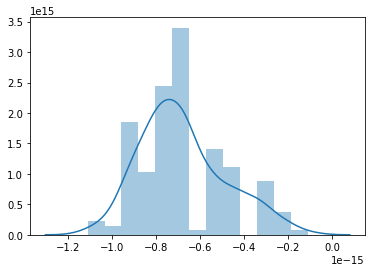

In [139]:
sns.distplot(res)

In [140]:
r2_score(y_true=y_train,y_pred=y_train_pred)

1.0

In [141]:
data_model_test[num_var]=scale.transform(data_model_test[num_var])
data_model_test.head()

Prev Close  Open Price  High Price  Low Price  Last Price  Close Price  \
65     0.062050    0.027322   -0.056712  -0.007853   -0.045969    -0.058292   
59     0.125487    0.078962    0.195016   0.076114    0.215903     0.219270   
197    0.798288    0.789617    0.735367   0.787351    0.776367     0.776488   
195    0.806082    0.808743    0.757933   0.808424    0.816400     0.813972   
156    0.680793    0.685792    0.654960   0.695163    0.712893     0.711190   

     Average Price  Total Traded Quantity  Turnover  No. of Trades  \
65       -0.053387               0.429374  0.219169       0.538844   
59        0.140435               0.430438  0.261714       0.531708   
197       0.761683               0.175185  0.161625       0.128386   
195       0.792278               0.180584  0.169652       0.161333   
156       0.682198               0.242121  0.212910       0.219520   

     Deliverable Qty       Day    Profit  Profit_%  Aug  Dec  Feb  Jan  Jul  \
65          0.434609  0.066667  0.580476  0.625904    0    0    0    0    0   
59          0.471728  0.800000  0.073316  0.063445    0    0    0    0    0   
197         0.080297  0.433333  0.443122  0.458251    0    0    0    0    0   
195         0.107732  0.366667  0.372664  0.409599    0    0    0    0    0   
156         0.071089  0.533333  0.301432  0.354043    1    0    0    0    0   

     Jun  Mar  May  Nov  Oct  Sep  
65     0    0    0    0    0    0  
59     0    1    0    0    0    0  
197    0    0    0    0    1    0  
195    0    0    0    0    1    0  
156    0    0    0    0    0    0

In [142]:
data_model_test.describe()

Prev Close  Open Price  High Price  Low Price  Last Price  Close Price  \
count   76.000000   76.000000   76.000000  76.000000   76.000000    76.000000   
mean     0.635226    0.619417    0.578078   0.620848    0.617646     0.613784   
std      0.231948    0.245471    0.241931   0.249014    0.241530     0.244154   
min      0.062050    0.027322   -0.056712  -0.007853   -0.045969    -0.058292   
25%      0.492232    0.474727    0.419297   0.468641    0.473702     0.467313   
50%      0.738378    0.739754    0.690799   0.738234    0.719906     0.720861   
75%      0.798344    0.791940    0.745938   0.795231    0.789067     0.787352   
max      1.001797    1.005137    0.967801   1.016304    0.992546     0.998102   

       Average Price  Total Traded Quantity   Turnover  No. of Trades  \
count      76.000000              76.000000  76.000000      76.000000   
mean        0.600919               0.315016   0.253599       0.320748   
std         0.249580               0.147710   0.099222       0.161153   
min        -0.053387               0.105719   0.107137       0.090490   
25%         0.444483               0.205748   0.173513       0.207909   
50%         0.717279               0.270173   0.230523       0.287544   
75%         0.779861               0.399501   0.319474       0.431671   
max         0.997768               0.805835   0.505029       0.795688   

       Deliverable Qty        Day     Profit   Profit_%        Aug        Dec  \
count        76.000000  76.000000  76.000000  76.000000  76.000000  76.000000   
mean          0.217537   0.500877   0.420110   0.441066   0.105263   0.078947   
std           0.157310   0.318979   0.102232   0.092089   0.308931   0.271448   
min           0.016331   0.000000   0.073316   0.063445   0.000000   0.000000   
25%           0.108067   0.200000   0.365109   0.400641   0.000000   0.000000   
50%           0.191830   0.500000   0.421793   0.443623   0.000000   0.000000   
75%           0.276259   0.766667   0.475519   0.481427   0.000000   0.000000   
max           0.838312   1.000000   0.780994   0.771532   1.000000   1.000000   

             Feb        Jan        Jul        Jun        Mar        May  \
count  76.000000  76.000000  76.000000  76.000000  76.000000  76.000000   
mean    0.118421   0.065789   0.092105   0.078947   0.078947   0.065789   
std     0.325253   0.249561   0.291096   0.271448   0.271448   0.249561   
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
50%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
75%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   

             Nov        Oct        Sep  
count  76.000000  76.000000  76.000000  
mean    0.118421   0.092105   0.039474  
std     0.325253   0.291096   0.196013  
min     0.000000   0.000000   0.000000  
25%     0.000000   0.000000   0.000000  
50%     0.000000   0.000000   0.000000  
75%     0.000000   0.000000   0.000000  
max     1.000000   1.000000   1.000000

In [143]:
data_model_test.head()

Prev Close  Open Price  High Price  Low Price  Last Price  Close Price  \
65     0.062050    0.027322   -0.056712  -0.007853   -0.045969    -0.058292   
59     0.125487    0.078962    0.195016   0.076114    0.215903     0.219270   
197    0.798288    0.789617    0.735367   0.787351    0.776367     0.776488   
195    0.806082    0.808743    0.757933   0.808424    0.816400     0.813972   
156    0.680793    0.685792    0.654960   0.695163    0.712893     0.711190   

     Average Price  Total Traded Quantity  Turnover  No. of Trades  \
65       -0.053387               0.429374  0.219169       0.538844   
59        0.140435               0.430438  0.261714       0.531708   
197       0.761683               0.175185  0.161625       0.128386   
195       0.792278               0.180584  0.169652       0.161333   
156       0.682198               0.242121  0.212910       0.219520   

     Deliverable Qty       Day    Profit  Profit_%  Aug  Dec  Feb  Jan  Jul  \
65          0.434609  0.066667  0.580476  0.625904    0    0    0    0    0   
59          0.471728  0.800000  0.073316  0.063445    0    0    0    0    0   
197         0.080297  0.433333  0.443122  0.458251    0    0    0    0    0   
195         0.107732  0.366667  0.372664  0.409599    0    0    0    0    0   
156         0.071089  0.533333  0.301432  0.354043    1    0    0    0    0   

     Jun  Mar  May  Nov  Oct  Sep  
65     0    0    0    0    0    0  
59     0    1    0    0    0    0  
197    0    0    0    0    1    0  
195    0    0    0    0    1    0  
156    0    0    0    0    0    0

In [144]:
y_test=data_model_test.pop('Close Price')
X_test=data_model_test

In [145]:
X_test_sm=sm.add_constant(X_test[col])

In [146]:
y_test_pred=lr_model.predict(X_test_sm)

In [147]:
res=y_test_pred-y_test

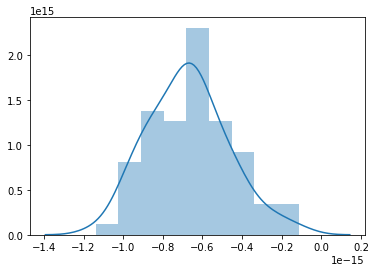

In [148]:
sns.distplot(res)

In [149]:
r2_score(y_true=y_test,y_pred=y_test_pred)

1.0

In [150]:
final_model=pd.DataFrame(y_test)
final_model['Close Price Pred']=y_test_pred

In [151]:
final_model.head()

Close Price  Close Price Pred
65     -0.058292         -0.058292
59      0.219270          0.219270
197     0.776488          0.776488
195     0.813972          0.813972
156     0.711190          0.711190

In [152]:
X_train

Prev Close    Profit  Aug  Feb  Jan  Jun  Mar  May
74     0.348719  0.644615    0    0    0    0    0    0
133    0.465078  0.402716    0    0    0    0    0    0
204    0.739805  0.226469    0    0    0    0    0    0
205    0.816875  0.455157    0    0    0    0    0    0
203    0.753095  0.456400    0    0    0    0    0    0
7      0.849809  0.353604    0    0    1    0    0    0
83     0.231132  0.460535    0    0    0    0    0    1
126    0.507444  0.293835    0    0    0    0    0    0
28     0.795302  0.456098    0    1    0    0    0    0
152    0.686262  0.395489    1    0    0    0    0    0
235    0.986010  0.409607    0    0    0    0    0    0
40     0.634913  0.543398    0    1    0    0    0    0
120    0.462581  0.427558    0    0    0    1    0    0
153    0.696910  0.368058    1    0    0    0    0    0
207    0.831446  0.403994    0    0    0    0    0    0
1      0.871950  0.410381    0    0    1    0    0    0
194    0.810693  0.434315    0    0    0    0    0    0
77     0.302482  0.497008    0    0    0    0    0    0
165    0.815488  0.418482    1    0    0    0    0    0
174    0.846467  0.411557    0    0    0    0    0    0
221    0.750558  0.335720    0    0    0    0    0    0
123    0.482661  0.446248    0    0    0    0    0    0
236    0.991109  0.458518    0    0    0    0    0    0
90     0.270711  0.370176    0    0    0    0    0    1
233    0.984874  0.379521    0    0    0    0    0    0
185    0.604040  0.288120    0    0    0    0    0    0
220    0.739197  0.393674    0    0    0    0    0    0
134    0.472885  0.372798    0    0    0    0    0    0
111    0.409594  0.480402    0    0    0    1    0    0
54     0.420743  0.591536    0    0    0    0    1    0
104    0.426041  0.378076    0    0    0    1    0    0
73     0.394600  0.539330    0    0    0    0    0    0
149    0.664425  0.402750    1    0    0    0    0    0
57     0.282098  1.000000    0    0    0    0    1    0
44     0.600724  0.354747    0    0    0    0    1    0
219    0.746489  0.441139    0    0    0    0    0    0
227    0.831446  0.491630    0    0    0    0    0    0
214    0.814114  0.547096    0    0    0    0    0    0
128    0.585294  0.545180    0    0    0    0    0    0
136    0.504115  0.457543    0    0    0    0    0    0
182    0.691031  0.547902    0    0    0    0    0    0
166    0.817100  0.600175    1    0    0    0    0    0
251    0.951530  0.397909    0    0    0    0    0    0
10     0.891792  0.357940    0    0    1    0    0    0
20     0.788816  0.413675    0    0    1    0    0    0
157    0.728404  0.338745    1    0    0    0    0    0
92     0.287700  0.677693    0    0    0    0    0    1
213    0.777455  0.329299    0    0    0    0    0    0
223    0.803942  0.483764    0    0    0    0    0    0
190    0.735776  0.407422    0    0    0    0    0    0
82     0.355972  0.740251    0    0    0    0    0    1
238    0.984055  0.424230    0    0    0    0    0    0
12     0.911833  0.383925    0    0    1    0    0    0
16     0.825422  0.414851    0    0    1    0    0    0
35     0.764958  0.507059    0    1    0    0    0    0
89     0.248306  0.365571    0    0    0    0    0    1
45     0.627383  0.423726    0    0    0    0    1    0
178    0.803546  0.419121    0    0    0    0    0    0
239    0.983408  0.447291    0    0    0    0    0    0
202    0.748537  0.410986    0    0    0    0    0    0
179    0.804906  0.403825    0    0    0    0    0    0
51     0.431100  0.291179    0    0    0    0    1    0
232    0.844155  0.064509    0    0    0    0    0    0
39     0.649669  0.460132    0    1    0    0    0    0
116    0.498263  0.423491    0    0    0    1    0    0
122    0.440493  0.315282    0    0    0    1    0    0
151    0.704784  0.469712    1    0    0    0    0    0
6      0.798896  0.293028    0    0    1    0    0    0
21     0.792317  0.415759    0    0    1    0    0    0
9      0.882783  0.399657    0    0    1    0    0    0
50     0.564038  0.760858    

## RFE

In [153]:
X_train=data_model_train

In [154]:
from sklearn.feature_selection import RFE

In [155]:
from sklearn.linear_model import LinearRegression

In [156]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [157]:
rfe=RFE(lm,10)
rfe=rfe.fit(X_train,y_train)

In [158]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Prev Close', True, 1),
 ('Open Price', True, 1),
 ('High Price', True, 1),
 ('Low Price', True, 1),
 ('Last Price', True, 1),
 ('Average Price', True, 1),
 ('Total Traded Quantity', False, 9),
 ('Turnover', False, 3),
 ('No. of Trades', True, 1),
 ('Deliverable Qty', False, 5),
 ('Day', False, 15),
 ('Profit', True, 1),
 ('Profit_%', False, 2),
 ('Aug', False, 10),
 ('Dec', False, 6),
 ('Feb', False, 8),
 ('Jan', False, 12),
 ('Jul', False, 7),
 ('Jun', False, 11),
 ('Mar', False, 13),
 ('May', True, 1),
 ('Nov', True, 1),
 ('Oct', False, 4),
 ('Sep', False, 14)]

In [159]:
col=X_train.columns[rfe.support_]

In [160]:
X_train.columns[~rfe.support_]

Index(['Total Traded Quantity', 'Turnover', 'Deliverable Qty', 'Day',
       'Profit_%', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'Oct',
       'Sep'],
      dtype='object')

In [161]:
X_train_rfe=X_train[col]

In [162]:
X_train_rfe=sm.add_constant(X_train_rfe)

In [163]:
lm=sm.OLS(y_train,X_train_rfe).fit()

In [164]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Close Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.107e+28
Date:                Sat, 23 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:17:33   Log-Likelihood:                 5485.5
No. Observations:                 176   AIC:                        -1.095e+04
Df Residuals:                     165   BIC:                        -1.091e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1171   1.98e-14   5.91e+12      0.000       0.117       0.117
Prev Close        1.0564    1.6e-13    6.6e+12      0.000       1.056       1.056
Open Price    -8.882e-16   4.28e-14     -0.021      0.983   -8.54e-14    8.37e-14
High Price    -1.554e-15   6.46e-14     -0.024      0.981   -1.29e-13    1.26e-13
Low Price       2.22e-15   5.38e-14      0.041      0.967   -1.04e-13    1.08e-13
Last Price    -8.882e-16   1.34e-13     -0.007      0.995   -2.65e-13    2.64e-13
Average Price -1.776e-15   9.95e-14     -0.018      0.986   -1.98e-13    1.95e-13
No. of Trades -7.216e-16    5.2e-15     -0.139      0.890    -1.1e-14    9.55e-15
Profit           -0.4152   6.21e-14  -6.68e+12      0.000      -0.415      -0.415
May           -8.327e-17    2.4e-15     -0.035      0.972   -4.82e-15    4.65e-15
Nov            3.123e-17   2.32e-15      0.013      0.989   -4.54e-15     4.6e-15
==============================================================================
Omnibus:                       16.646   Durbin-Watson:                   0.149
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.169
Skew:                           0.609   Prob(JB):                     0.000838
Kurtosis:                       2.329   Cond. No.                         758.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [165]:
vif=pd.DataFrame()
X_train_rfe=X_train_rfe[col]
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

Features       VIF
5  Average Price  13423.04
0     Prev Close   5542.97
2     High Price   5378.17
3      Low Price   4136.28
1     Open Price   2579.19
4     Last Price   1629.51
7         Profit    169.03
6  No. of Trades     11.20
8            May      1.49
9            Nov      1.11

In [166]:
# col=col.drop('Turnover')
# X_train_rfe=X_train[col]
# X_train_rfe=sm.add_constant(X_train_rfe)
# lm=sm.OLS(y_train,X_train_rfe).fit()
# lm.summary()

In [167]:
# vif=pd.DataFrame()
# X_train_rfe=X_train_rfe[col]
# vif['Features']=X_train_rfe.columns
# vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
# vif['VIF']=round(vif['VIF'],2)
# vif=vif.sort_values(by='VIF',ascending=False)
# vif

In [168]:
# col=col.drop('Total Traded Quantity')
# X_train_rfe=X_train[col]
# X_train_rfe=sm.add_constant(X_train_rfe)
# lm=sm.OLS(y_train,X_train_rfe).fit()
# lm.summary()

In [169]:
# vif=pd.DataFrame()
# X_train_rfe=X_train_rfe[col]
# vif['Features']=X_train_rfe.columns
# vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
# vif['VIF']=round(vif['VIF'],2)
# vif=vif.sort_values(by='VIF',ascending=False)
# vif

In [170]:
col

Index(['Prev Close', 'Open Price', 'High Price', 'Low Price', 'Last Price',
       'Average Price', 'No. of Trades', 'Profit', 'May', 'Nov'],
      dtype='object')

In [171]:
col=col.drop('Average Price')
X_train_rfe=X_train[col]
X_train_rfe=sm.add_constant(X_train_rfe)
lm=sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Close Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.812e+28
Date:                Sat, 23 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:17:33   Log-Likelihood:                 5501.1
No. Observations:                 176   AIC:                        -1.098e+04
Df Residuals:                     166   BIC:                        -1.095e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1171   1.79e-14   6.56e+12      0.000       0.117       0.117
Prev Close        1.0564   1.41e-13   7.49e+12      0.000       1.056       1.056
Open Price      2.22e-16    3.8e-14      0.006      0.995   -7.48e-14    7.52e-14
High Price      2.22e-16   4.33e-14      0.005      0.996   -8.52e-14    8.56e-14
Low Price     -5.551e-16   3.33e-14     -0.017      0.987   -6.63e-14    6.52e-14
Last Price     3.109e-15   1.22e-13      0.026      0.980   -2.37e-13    2.44e-13
No. of Trades  5.551e-17   4.73e-15      0.012      0.991   -9.28e-15    9.39e-15
Profit           -0.4152   5.51e-14  -7.53e+12      0.000      -0.415      -0.415
May            2.776e-16   2.19e-15      0.127      0.899   -4.04e-15    4.59e-15
Nov            5.031e-17   2.11e-15      0.024      0.981   -4.12e-15    4.22e-15
==============================================================================
Omnibus:                       19.217   Durbin-Watson:                   0.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.155
Skew:                           0.412   Prob(JB):                      0.00624
Kurtosis:                       2.160   Cond. No.                         702.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [172]:
vif=pd.DataFrame()
X_train_rfe=X_train_rfe[col]
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

Features      VIF
0     Prev Close  5071.83
2     High Price  2879.96
1     Open Price  2385.58
3      Low Price  1633.51
4     Last Price  1491.44
6         Profit   152.77
5  No. of Trades    11.19
7            May     1.48
8            Nov     1.11

In [173]:
col=col.drop('Prev Close')
X_train_rfe=X_train[col]
X_train_rfe=sm.add_constant(X_train_rfe)
lm=sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Close Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.424e+04
Date:                Sat, 23 Jan 2021   Prob (F-statistic):          7.08e-301
Time:                        17:17:33   Log-Likelihood:                 733.59
No. Observations:                 176   AIC:                            -1449.
Df Residuals:                     167   BIC:                            -1421.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0067      0.004     -1.717      0.088      -0.014       0.001
Open Price       -0.0597      0.022     -2.777      0.006      -0.102      -0.017
High Price        0.1114      0.024      4.734      0.000       0.065       0.158
Low Price         0.1092      0.017      6.295      0.000       0.075       0.143
Last Price        0.8537      0.025     34.439      0.000       0.805       0.903
No. of Trades     0.0019      0.003      0.687      0.493      -0.004       0.007
Profit           -0.0096      0.006     -1.639      0.103      -0.021       0.002
May               0.0027      0.001      2.142      0.034       0.000       0.005
Nov           -6.004e-05      0.001     -0.049      0.961      -0.002       0.002
==============================================================================
Omnibus:                       26.706   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              173.827
Skew:                          -0.059   Prob(JB):                     1.79e-38
Kurtosis:                       7.867   Cond. No.                         204.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [174]:
vif=pd.DataFrame()
X_train_rfe=X_train_rfe[col]
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

Features      VIF
0     Open Price  2383.86
2      Low Price  1574.16
1     High Price  1444.48
3     Last Price  1242.52
5         Profit    27.08
4  No. of Trades     6.29
6            May     1.48
7            Nov     1.11

In [175]:
col=col.drop('Nov')
X_train_rfe=X_train[col]
X_train_rfe=sm.add_constant(X_train_rfe)
lm=sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Close Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.083e+05
Date:                Sat, 23 Jan 2021   Prob (F-statistic):          2.08e-303
Time:                        17:17:33   Log-Likelihood:                 733.58
No. Observations:                 176   AIC:                            -1451.
Df Residuals:                     168   BIC:                            -1426.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0067      0.004     -1.721      0.087      -0.014       0.001
Open Price       -0.0598      0.021     -2.798      0.006      -0.102      -0.018
High Price        0.1115      0.023      4.753      0.000       0.065       0.158
Low Price         0.1092      0.017      6.314      0.000       0.075       0.143
Last Price        0.8537      0.025     34.555      0.000       0.805       0.902
No. of Trades     0.0019      0.003      0.687      0.493      -0.004       0.007
Profit           -0.0096      0.006     -1.644      0.102      -0.021       0.002
May               0.0027      0.001      2.150      0.033       0.000       0.005
==============================================================================
Omnibus:                       26.694   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              173.704
Skew:                          -0.058   Prob(JB):                     1.91e-38
Kurtosis:                       7.866   Cond. No.                         204.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [176]:
vif=pd.DataFrame()
X_train_rfe=X_train_rfe[col]
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

Features      VIF
0     Open Price  2368.48
2      Low Price  1574.12
1     High Price  1442.23
3     Last Price  1238.86
5         Profit    26.75
4  No. of Trades     6.25
6            May     1.48

In [177]:
col=col.drop('No. of Trades')
X_train_rfe=X_train[col]
X_train_rfe=sm.add_constant(X_train_rfe)
lm=sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Close Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.268e+05
Date:                Sat, 23 Jan 2021   Prob (F-statistic):          7.07e-306
Time:                        17:17:33   Log-Likelihood:                 733.34
No. Observations:                 176   AIC:                            -1453.
Df Residuals:                     169   BIC:                            -1430.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0048      0.003     -1.743      0.083      -0.010       0.001
Open Price    -0.0617      0.021     -2.913      0.004      -0.103      -0.020
High Price     0.1204      0.019      6.188      0.000       0.082       0.159
Low Price      0.1076      0.017      6.288      0.000       0.074       0.141
Last Price     0.8474      0.023     36.940      0.000       0.802       0.893
Profit        -0.0107      0.006     -1.925      0.056      -0.022       0.000
May            0.0029      0.001      2.361      0.019       0.000       0.005
==============================================================================
Omnibus:                       25.579   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              155.199
Skew:                          -0.070   Prob(JB):                     1.99e-34
Kurtosis:                       7.598   Cond. No.                         185.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [178]:
vif=pd.DataFrame()
X_train_rfe=X_train_rfe[col]
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

Features      VIF
0  Open Price  2161.31
2   Low Price  1512.51
1  High Price  1398.81
3  Last Price  1035.58
4      Profit    14.75
5         May     1.33

In [179]:
col=col.drop('Open Price')
X_train_rfe=X_train[col]
X_train_rfe=sm.add_constant(X_train_rfe)
lm=sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Close Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.457e+05
Date:                Sat, 23 Jan 2021   Prob (F-statistic):          1.10e-306
Time:                        17:17:33   Log-Likelihood:                 729.03
No. Observations:                 176   AIC:                            -1446.
Df Residuals:                     170   BIC:                            -1427.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0025      0.003     -0.913      0.363      -0.008       0.003
High Price     0.0923      0.017      5.345      0.000       0.058       0.126
Low Price      0.0717      0.012      5.912      0.000       0.048       0.096
Last Price     0.8506      0.023     36.325      0.000       0.804       0.897
Profit        -0.0203      0.005     -4.440      0.000      -0.029      -0.011
May            0.0028      0.001      2.258      0.025       0.000       0.005
==============================================================================
Omnibus:                       29.814   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.549
Skew:                          -0.042   Prob(JB):                     1.93e-51
Kurtosis:                       8.643   Cond. No.                         153.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [180]:
vif=pd.DataFrame()
X_train_rfe=X_train_rfe[col]
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

Features     VIF
2  Last Price  805.62
0  High Price  635.79
1   Low Price  525.88
3      Profit    6.15
4         May    1.33

In [181]:
col=col.drop('Low Price')
X_train_rfe=X_train[col]
X_train_rfe=sm.add_constant(X_train_rfe)
lm=sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Close Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.520e+05
Date:                Sat, 23 Jan 2021   Prob (F-statistic):          2.13e-302
Time:                        17:17:33   Log-Likelihood:                 712.57
No. Observations:                 176   AIC:                            -1415.
Df Residuals:                     171   BIC:                            -1399.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0111      0.002     -4.467      0.000      -0.016      -0.006
High Price     0.0694      0.018      3.770      0.000       0.033       0.106
Last Price     0.9469      0.018     51.432      0.000       0.911       0.983
Profit        -0.0042      0.004     -1.050      0.295      -0.012       0.004
May            0.0037      0.001      2.732      0.007       0.001       0.006
==============================================================================
Omnibus:                       49.503   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.131
Skew:                          -0.976   Prob(JB):                     8.64e-47
Kurtosis:                       8.011   Cond. No.                         113.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [182]:
vif=pd.DataFrame()
X_train_rfe=X_train_rfe[col]
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

Features     VIF
0  High Price  583.08
1  Last Price  580.44
2      Profit    5.61
3         May    1.33

In [183]:
col=col.drop('High Price')
X_train_rfe=X_train[col]
X_train_rfe=sm.add_constant(X_train_rfe)
lm=sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Close Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.882e+05
Date:                Sat, 23 Jan 2021   Prob (F-statistic):          4.15e-302
Time:                        17:17:33   Log-Likelihood:                 705.55
No. Observations:                 176   AIC:                            -1403.
Df Residuals:                     172   BIC:                            -1390.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0180      0.002    -10.266      0.000      -0.021      -0.015
Last Price     1.0161      0.002    662.898      0.000       1.013       1.019
Profit         0.0062      0.003      2.028      0.044       0.000       0.012
May            0.0035      0.001      2.504      0.013       0.001       0.006
==============================================================================
Omnibus:                       31.634   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.971
Skew:                          -0.550   Prob(JB):                     2.20e-29
Kurtosis:                       7.097   Cond. No.                         12.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [184]:
vif=pd.DataFrame()
X_train_rfe=X_train_rfe[col]
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

Features   VIF
1      Profit  5.58
0  Last Price  5.20
2         May  1.22

In [185]:
col=col.drop('May')
X_train_rfe=X_train[col]
X_train_rfe=sm.add_constant(X_train_rfe)
lm=sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Close Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.739e+05
Date:                Sat, 23 Jan 2021   Prob (F-statistic):          1.52e-303
Time:                        17:17:33   Log-Likelihood:                 702.40
No. Observations:                 176   AIC:                            -1399.
Df Residuals:                     173   BIC:                            -1389.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0164      0.002     -9.869      0.000      -0.020      -0.013
Last Price     1.0143      0.001    735.614      0.000       1.012       1.017
Profit         0.0058      0.003      1.884      0.061      -0.000       0.012
==============================================================================
Omnibus:                       34.827   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.485
Skew:                          -0.624   Prob(JB):                     5.71e-33
Kurtosis:                       7.323   Cond. No.                         12.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [186]:
vif=pd.DataFrame()
X_train_rfe=X_train_rfe[col]
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

Features   VIF
0  Last Price  4.62
1      Profit  4.62

## Residual analysis

In [188]:
X_test=data_model_test[col]

In [189]:
X_test_rfe=sm.add_constant(X_test)

In [190]:
X_test.head()

Last Price    Profit
65    -0.045969  0.580476
59     0.215903  0.073316
197    0.776367  0.443122
195    0.816400  0.372664
156    0.712893  0.301432

In [191]:
y_test_pred=lm.predict(X_test_rfe)

In [192]:
res=y_test_pred-y_test

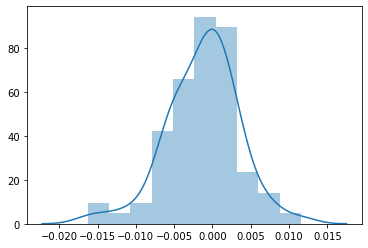

In [193]:
sns.distplot(res)

In [194]:
r2_score(y_true=y_test,y_pred=y_test_pred)

0.9995966043350183

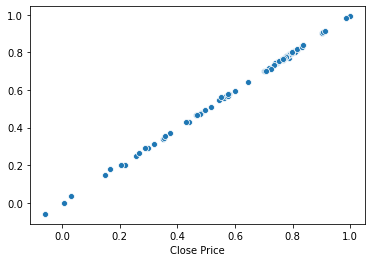

In [195]:
sns.scatterplot(y_test,y_test_pred)

## DECISION TREE

In [215]:
data_model_train,data_model_test=train_test_split(data_model,train_size=0.7,random_state=100)

In [216]:
data_model_train.head()

Prev Close  Open Price  High Price  Low Price  Last Price  Close Price  \
74      5331.35      5131.3      5131.3    4884.50     5009.95      5001.10   
133     5771.75      5810.0      5879.8    5755.00     5809.10      5801.30   
204     6811.55      6858.0      7124.7    6832.00     7102.00      7103.25   
205     7103.25      7100.0      7161.3    6935.05     7056.50      7054.80   
203     6861.85      6828.0      6860.0    6775.20     6809.00      6811.55   

     Average Price  Total Traded Quantity      Turnover  No. of Trades  \
74         5001.21                1843174  9.218105e+09         174888   
133        5817.70                1246712  7.252996e+09          98323   
204        7021.17                1758999  1.235023e+10         130909   
205        7056.34                1559361  1.100339e+10         133834   
203        6808.01                 584542  3.979570e+09          51489   

     Deliverable Qty  Day  Profit  Profit_%  Aug  Dec  Feb  Jan  Jul  Jun  \
74            547983   21  330.25      6.19    0    0    0    0    0    0   
133           294213   15  -29.55     -0.51    0    0    0    0    1    0   
204           397760   23 -291.70     -4.28    0    0    0    0    0    0   
205           367279   26   48.45      0.68    0    0    0    0    0    0   
203           173752   22   50.30      0.73    0    0    0    0    0    0   

     Mar  May  Nov  Oct  Sep  
74     0    0    0    0    0  
133    0    0    0    0    0  
204    0    0    0    1    0  
205    0    0    0    1    0  
203    0    0    0    1    0

In [227]:
y_train=data_model_train.pop('Close Price')
X_train=data_model_train
y_test=data_model_test.pop('Close Price')
X_test=data_model_test

In [228]:
X_train.shape

(176, 24)

In [229]:
y_train.shape

(176,)

In [230]:
from sklearn.tree import DecisionTreeRegressor

In [231]:
dt=DecisionTreeRegressor(max_depth=3)
dt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [232]:
len(data_model_test.columns)

24

In [233]:
X_test=data_model_test

In [234]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus,graphviz

In [235]:
#code for generating model and graph
def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
                    feature_names=X_train.columns
                   )
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [236]:
from sklearn.metrics import accuracy_score, confusion_matrix,r2_score


def evaluate_model(dt_classifier):
    y_train_pred=dt_classifier.predict(X_train)
    y_test_pred=dt_classifier.predict(X_test)
    print("Train performance")
    print("accuracy_score",r2_score(y_train,y_train_pred))
    print("-"*50)
    print("Test Performance")
    print("r2_score",r2_score(y_test,y_test_pred))

In [237]:
evaluate_model(dt)

Train performance
accuracy_score 0.982857824368497
--------------------------------------------------
Test Performance
r2_score 0.9685061603193059


## Decision Tree Default

In [238]:
dt_default=DecisionTreeRegressor(random_state=42)

In [239]:
dt_default.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [240]:
evaluate_model(dt_default)

Train performance
accuracy_score 1.0
--------------------------------------------------
Test Performance
r2_score 0.9934406472280747


## DT with different parameters

In [241]:
dt_params=DecisionTreeRegressor(max_depth=5,min_samples_split=10,min_samples_leaf=4,random_state=42)
dt_params.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=4, min_samples_split=10,
                      random_state=42)

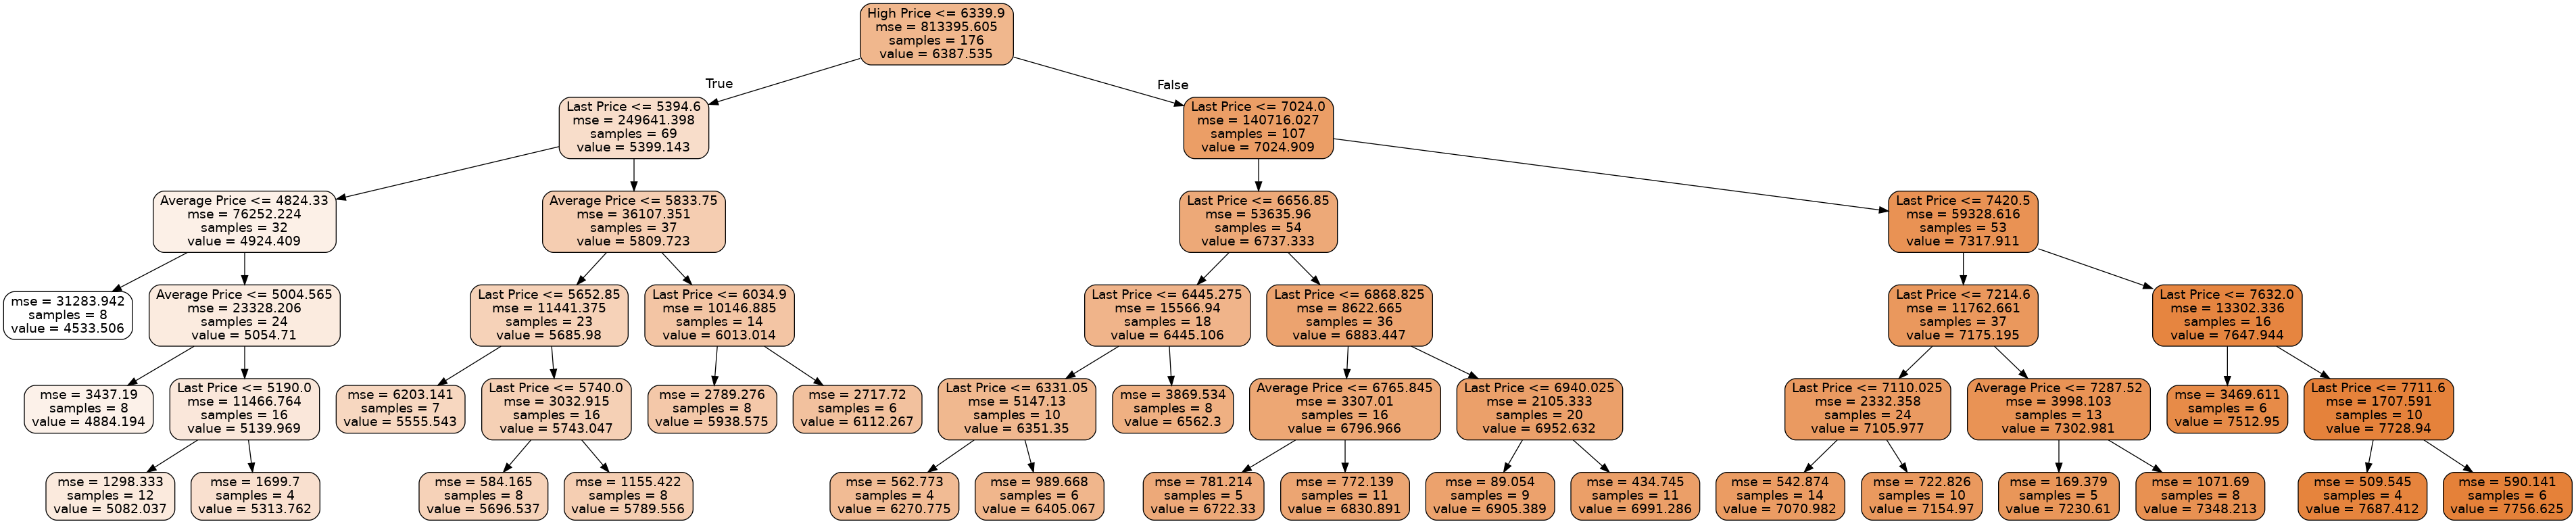

In [242]:
gph=get_dt_graph(dt_params)
Image(gph.create_png())

In [243]:
evaluate_model(dt_params)

Train performance
accuracy_score 0.9964802341411638
--------------------------------------------------
Test Performance
r2_score 0.9853910953395806


In [250]:
dt_params=DecisionTreeRegressor(max_depth=4,min_samples_split=20,min_samples_leaf=10,random_state=42,criterion='mse')
dt_params.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=10, min_samples_split=20,
                      random_state=42)

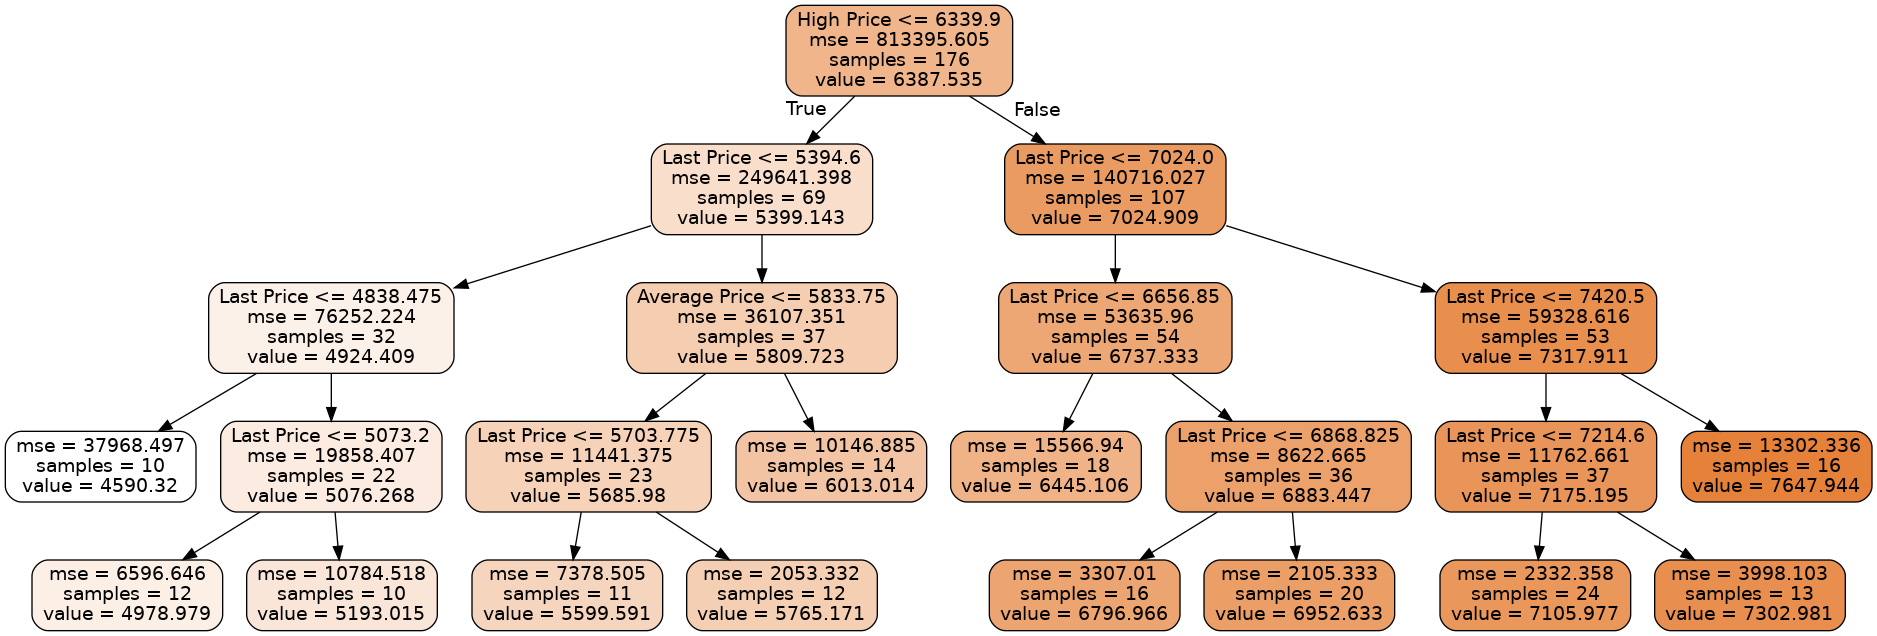

In [251]:
gph=get_dt_graph(dt_params)
Image(gph.create_png())

In [252]:
evaluate_model(dt_params)

Train performance
accuracy_score 0.9894482541654749
--------------------------------------------------
Test Performance
r2_score 0.9758573157746506


## Hyper Parameter tuning using Grid Search CV

In [253]:
dt=DecisionTreeRegressor(random_state=42)

In [254]:
from sklearn.model_selection import GridSearchCV

In [256]:
params={
    'max_depth':[3,4,5,6],
    'min_samples_leaf':[5,10,20],
    'min_samples_split':[10,20,30]
}


In [262]:
grid_search=GridSearchCV(estimator=dt,
             param_grid=params,
            cv=4,verbose=1,n_jobs=-1)

In [263]:
%%time
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 36 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s


CPU times: user 430 ms, sys: 161 ms, total: 590 ms
Wall time: 2.79 s


[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:    2.8s finished


GridSearchCV(cv=4, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [5, 10, 20],
                         'min_samples_split': [10, 20, 30]},
             verbose=1)

In [264]:
grid_search.best_estimator_

DecisionTreeRegressor(max_depth=6, min_samples_leaf=5, min_samples_split=10,
                      random_state=42)

In [266]:
pd.DataFrame(grid_search.cv_results_).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.015385      0.006383         0.006491        0.002095   
1        0.013614      0.006402         0.007392        0.003243   
2        0.010506      0.001857         0.008260        0.001666   
3        0.013799      0.004532         0.011806        0.003926   
4        0.014182      0.008186         0.007432        0.004213   
5        0.022858      0.008228         0.010528        0.005208   
6        0.012435      0.002458         0.007332        0.001546   
7        0.016333      0.002490         0.011598        0.002132   
8        0.014988      0.007993         0.007611        0.003097   
9        0.013629      0.003293         0.009048        0.003144   
10       0.019284      0.007303         0.007156        0.002123   
11       0.011671      0.000372         0.006119        0.001918   
12       0.009218      0.000795         0.004229        0.000756   
13       0.008806      0.002288         0.005893        0.001999   
14       0.008447      0.002325         0.003406        0.000664   
15       0.005407      0.000794         0.005229        0.001452   
16       0.008966      0.002059         0.004107        0.000235   
17       0.012231      0.001840         0.005983        0.002003   
18       0.009318      0.002579         0.006766        0.003321   
19       0.008430      0.001457         0.005037        0.000740   
20       0.010454      0.002520         0.006200        0.000621   
21       0.009603      0.001887         0.005668        0.000879   
22       0.012329      0.002635         0.006193        0.001223   
23       0.010577      0.001418         0.006341        0.003442   
24       0.012437      0.004786         0.005013        0.001235   
25       0.012619      0.007451         0.010379        0.004708   
26       0.010841      0.005317         0.004624        0.000927   
27       0.011280      0.000874         0.009226        0.008842   
28       0.012123      0.003243         0.005783        0.002148   
29       0.009171      0.002837         0.005752        0.002107   
30       0.010826      0.003363         0.011880        0.008257   
31       0.013306      0.004877         0.008392        0.005126   
32       0.008240      0.000889         0.005605        0.001048   
33       0.008590      0.002309         0.010178        0.006258   
34       0.010709      0.002147         0.008635        0.001167   
35       0.011025      0.002568         0.003906        0.000602   

   param_max_depth param_min_samples_leaf param_min_samples_split  \
0                3                      5                      10   
1                3                      5                      20   
2                3                      5                      30   
3                3                     10                      10   
4                3                     10                      20   
5                3                     10                      30   
6                3                     20                      10   
7                3                     20                      20   
8                3                     20                      30   
9                4                      5                      10   
10               4                      5                      20   
11               4                      5                      30   
12               4                     10                      10   
13               4                     10                      20   
14               4                     10                      30   
15               4                     20                      10   
16               4                     20                      20   
17               4                     20                      30   
18               5                      5                      10   
19               5                      5                      20   
20               5                    

In [267]:
pd.DataFrame(grid_search.cv_results_).nlargest(5,'mean_test_score')

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
27       0.011280      0.000874         0.009226        0.008842   
18       0.009318      0.002579         0.006766        0.003321   
9        0.013629      0.003293         0.009048        0.003144   
21       0.009603      0.001887         0.005668        0.000879   
22       0.012329      0.002635         0.006193        0.001223   

   param_max_depth param_min_samples_leaf param_min_samples_split  \
27               6                      5                      10   
18               5                      5                      10   
9                4                      5                      10   
21               5                     10                      10   
22               5                     10                      20   

                                               params  split0_test_score  \
27  {'max_depth': 6, 'min_samples_leaf': 5, 'min_s...           0.989516   
18  {'max_depth': 5, 'min_samples_leaf': 5, 'min_s...           0.988771   
9   {'max_depth': 4, 'min_samples_leaf': 5, 'min_s...           0.986265   
21  {'max_depth': 5, 'min_samples_leaf': 10, 'min_...           0.976083   
22  {'max_depth': 5, 'min_samples_leaf': 10, 'min_...           0.976083   

    split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
27           0.993725           0.988495           0.989076         0.990203   
18           0.993558           0.986275           0.988949         0.989388   
9            0.985346           0.985723           0.985978         0.985828   
21           0.987243           0.976978           0.981942         0.980561   
22           0.987243           0.976978           0.981942         0.980561   

    std_test_score  rank_test_score  
27        0.002065                1  
18        0.002629                2  
9         0.000338                3  
21        0.004456                4  
22        0.004456                4

In [268]:
grid_search.best_score_

0.9902029930163249

In [269]:
grid_search.best_estimator_

DecisionTreeRegressor(max_depth=6, min_samples_leaf=5, min_samples_split=10,
                      random_state=42)

In [270]:
grid_search.best_params_

{'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 10}

In [271]:
dt_best=grid_search.best_estimator_

In [272]:
evaluate_model(dt_best)

Train performance
accuracy_score 0.9965538204910944
--------------------------------------------------
Test Performance
r2_score 0.9854377514813601


## Random Forest REGRESSOR

In [273]:
from sklearn.ensemble import RandomForestRegressor

In [274]:
rf=RandomForestRegressor(random_state=42,n_jobs=-1,max_depth=3,min_samples_leaf=20)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=3, min_samples_leaf=20, n_jobs=-1,
                      random_state=42)

In [279]:
rf.estimators_[0]

DecisionTreeRegressor(max_depth=3, max_features='auto', min_samples_leaf=20,
                      random_state=1608637542)

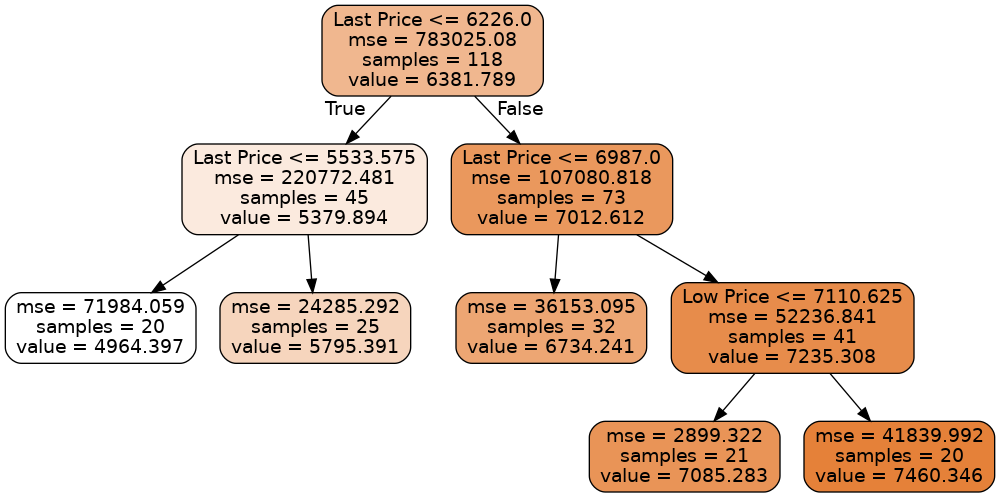

In [280]:
gph=get_dt_graph(rf.estimators_[0])
Image(gph.create_png())

In [281]:
evaluate_model(rf.estimators_[0])

Train performance
accuracy_score 0.9441294561327823
--------------------------------------------------
Test Performance
r2_score 0.9010538611344345


In [282]:
imp_df=pd.DataFrame({
    'Var':X_train.columns,
    'Imp':rf.feature_importances_
})

In [287]:
imp_df.head()

Var       Imp
0  Prev Close  0.049864
1  Open Price  0.051091
2  High Price  0.221159
3   Low Price  0.089801
4  Last Price  0.384659